In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.pandas.set_option('display.max_columns',None)

In [3]:
df=pd.read_csv('train1.csv')

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df['MSZoning'].value_counts()


RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

<AxesSubplot:>

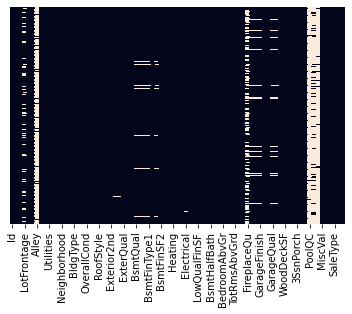

In [6]:
#Heatr map for null values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)


In [7]:
df.shape


(1460, 81)

In [5]:
#Checking percentage of nan values present
#Make the list of features with missing values
features_with_na= [feat for feat in df.columns if df[feat].isnull().sum()>=1]

#Print feature name and percentage of missung values
for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')

LotFrontage 0.1774  % missing values
Alley 0.9377  % missing values
MasVnrType 0.0055  % missing values
MasVnrArea 0.0055  % missing values
BsmtQual 0.0253  % missing values
BsmtCond 0.0253  % missing values
BsmtExposure 0.026  % missing values
BsmtFinType1 0.0253  % missing values
BsmtFinType2 0.026  % missing values
Electrical 0.0007  % missing values
FireplaceQu 0.4726  % missing values
GarageType 0.0555  % missing values
GarageYrBlt 0.0555  % missing values
GarageFinish 0.0555  % missing values
GarageQual 0.0555  % missing values
GarageCond 0.0555  % missing values
PoolQC 0.9952  % missing values
Fence 0.8075  % missing values
MiscFeature 0.963  % missing values


In [6]:
features_with_na

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [562]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [563]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Analyzing using Sweetviz Library


In [16]:
import sweetviz
my_report = sweetviz.analyze([df,'Train'],target_feat='SalePrice')

:FEATURES DONE:                    |█████████████████████| [100%]   01:02  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:09  -> (00:00 left)


Creating Associations graph... DONE!


In [18]:
my_report.show_html('Report.html')

Report Report.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


In [19]:
##Comparing Train and Test dataframes
df2= pd.read_csv('test1.csv')
my_report1 = sweetviz.compare([df,'Train'],[df2,'test'],"SalePrice")

:FEATURES DONE:                    |█████████████████████| [100%]   01:13  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:21  -> (00:00 left)


Creating Associations graph... DONE!


In [21]:
my_report1.show_html('Report.html')

Report Report.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


#### Since there are many missing values, we need to find a relationship b/w missing values and Sales Price

Let's plot some diagram for this relationship

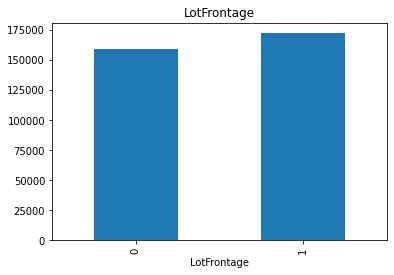

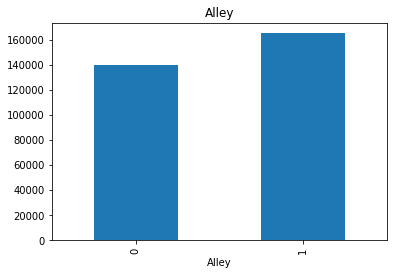

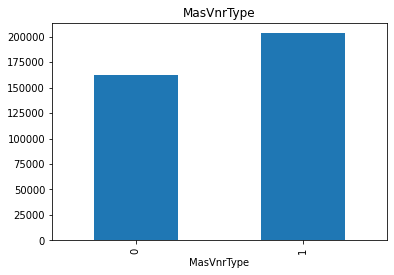

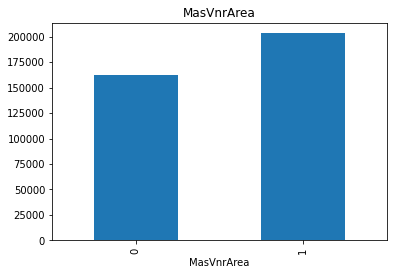

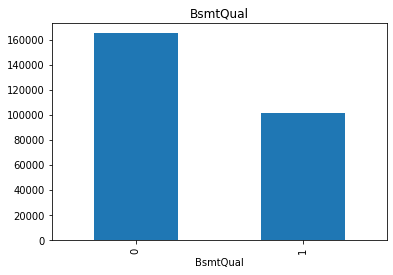

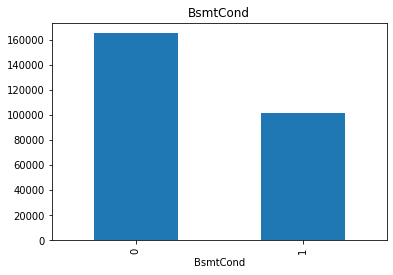

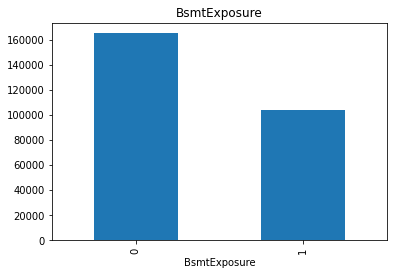

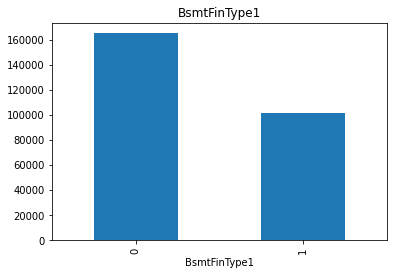

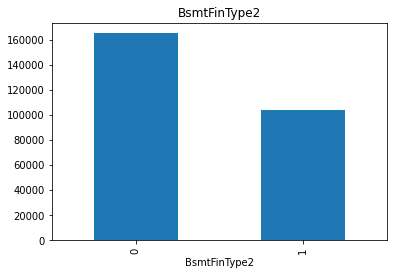

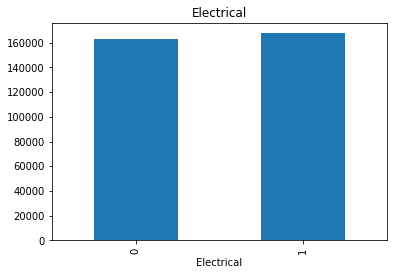

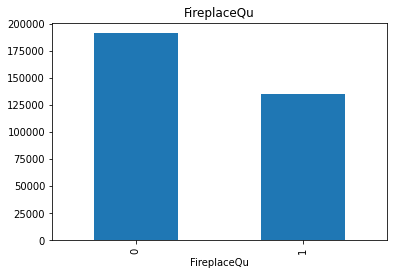

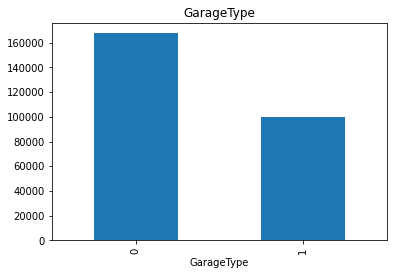

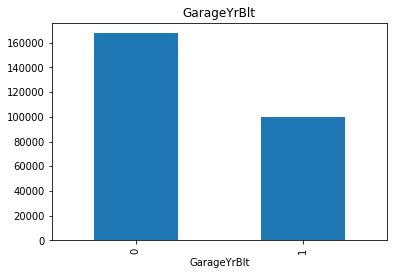

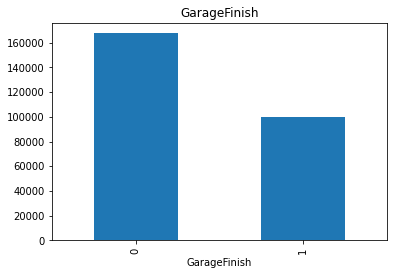

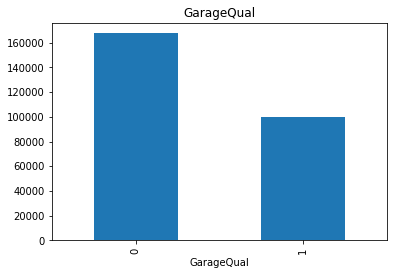

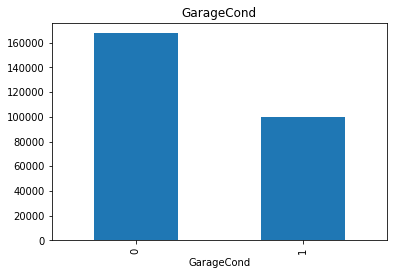

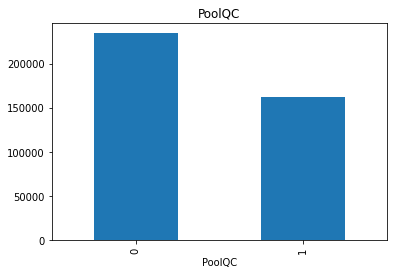

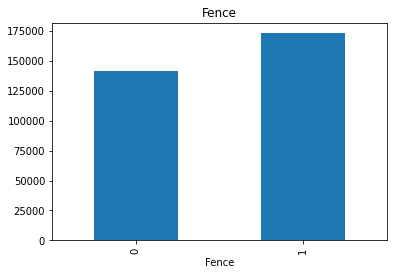

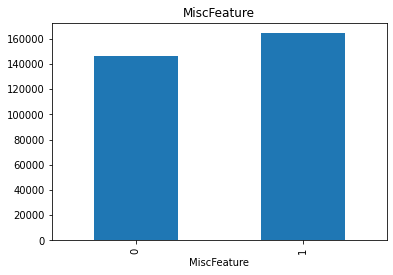

In [7]:
for features in features_with_na:
    data = df.copy()
    
    #Let's make a variable that indicates 1 if the observation was missing or 0 otherwise 
    data[features] = np.where(data[features].isnull(),1,0)
    
    #Let's calculate the median SalePrice where the information was missing or present
    data.groupby(features)['SalePrice'].median().plot.bar()
    plt.title(features)
    plt.show()
    


Here With the relation between the missing values and the dependent variable is clearly visible.So We need to replace these nan values with something meaningful which we will do in the Feature Engineering section

From the above dataset some of the features like Id is not required

In [8]:
print("Id of houses {}".format(len(df.Id)))

Id of houses 1460


### Numerical Variables

In [9]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes!= 'O' ]
print("no. of numerical features {}".format(len(numerical_features)))

#Visualize the numerical features
df[numerical_features].head()

no. of numerical features 38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


### Temporal Variables(e.g. Datetime variables)

From the Dataset we have 4 year variables. We have to extract information from the datetime variables like no. of years or no. of days. One example in this specific scenario can be difference in years between the year the house was built and the year the house was sold.

In [10]:
year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [11]:
# Let's explore the content of these year variables
for feature in year_feature:
    print(feature,df[feature].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

Text(0.5, 1.0, 'House Price vs Year Sold')

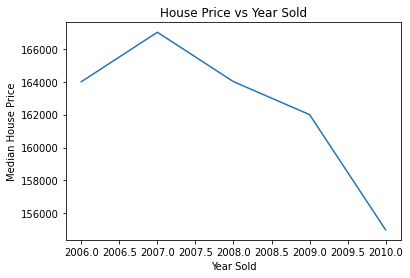

In [12]:
# Let's analyze the Temporal Datetime variable
##We will check if there is a relation b/w year the house is sold and the SalePrice

df.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title('House Price vs Year Sold')

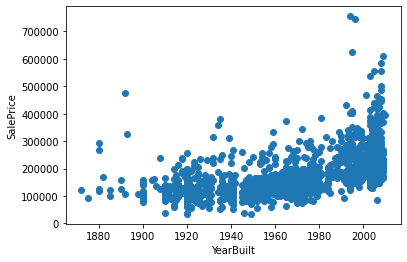

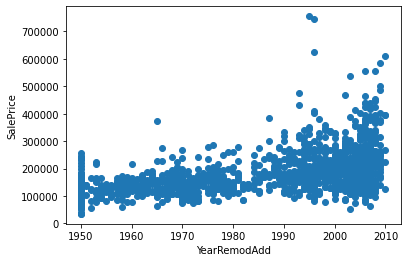

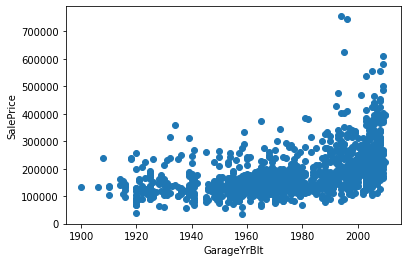

In [13]:
# Here we will compare the difference b/w all year features with SalePrice
for feature in year_feature:
    if feature!= 'YrSold':
        data=df.copy()
        #df[feature]=df['YrSold']-df[feature]
        
        plt.scatter(df[feature],df['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()
        
        

In [14]:
## Numerical variables are usually of 2 type
## 1. Continous variable 2. Discrete Variables

discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25 and feature not in year_feature]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 17


In [15]:
discrete_feature

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [16]:
df[discrete_feature].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


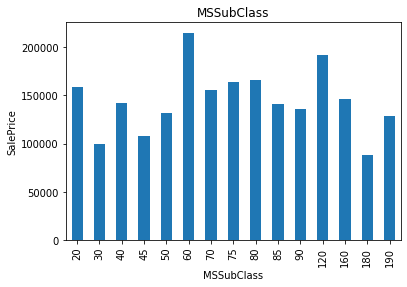

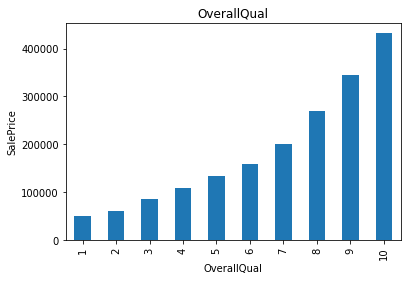

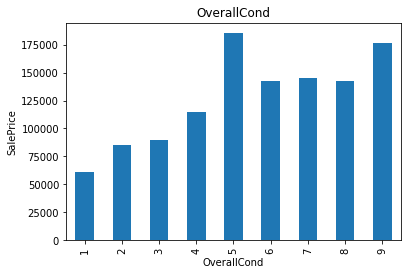

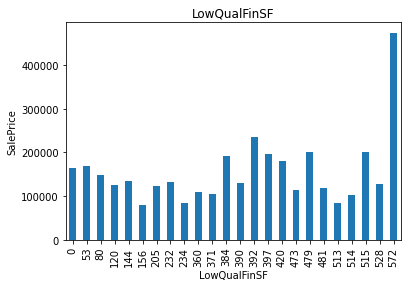

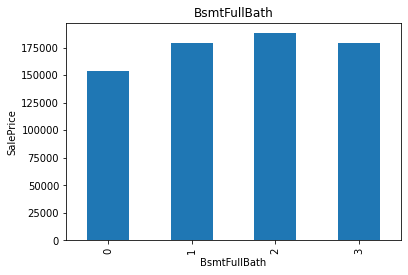

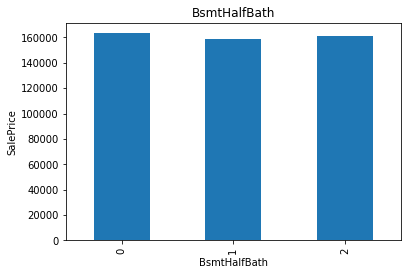

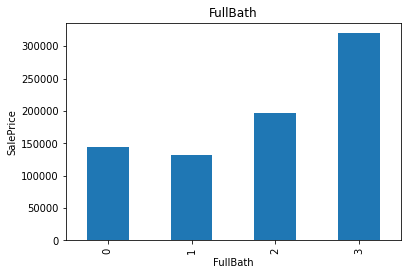

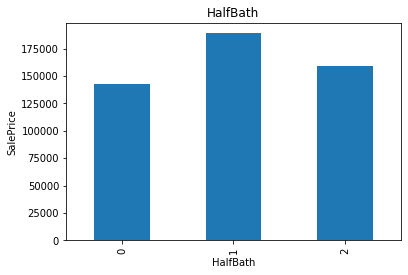

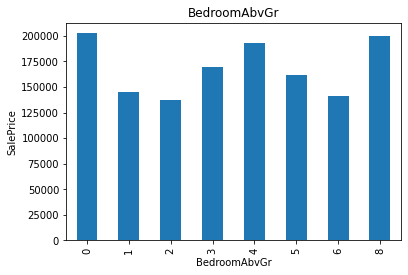

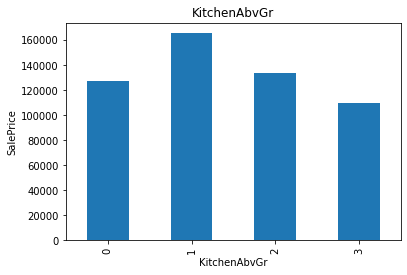

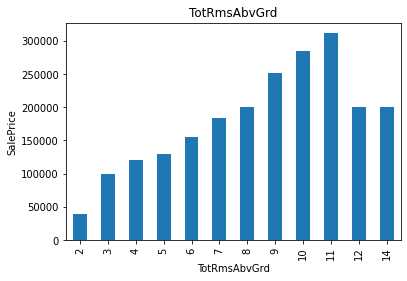

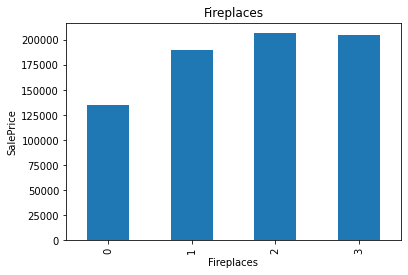

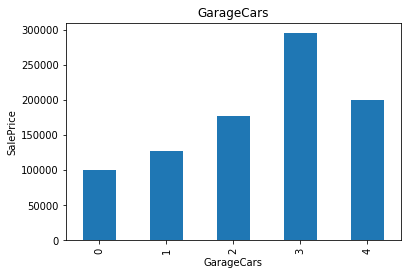

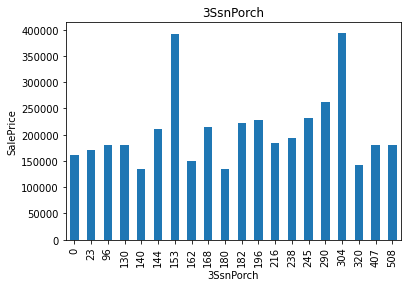

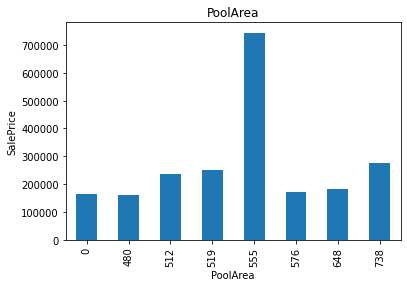

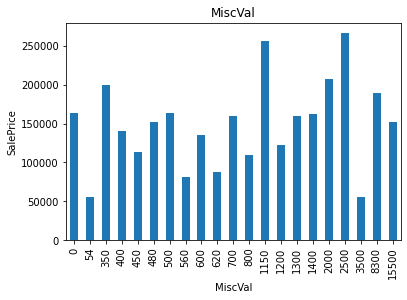

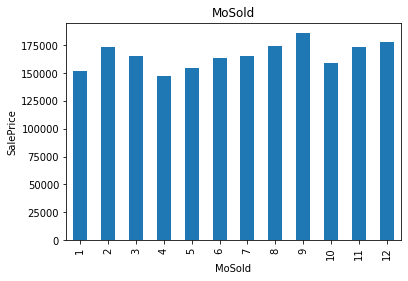

In [17]:


## Lets Find the realtionship between them and Sale PRice

for feature in discrete_feature:
    data=df.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()


### Continuous Variable

In [18]:
continuous_feature= [feature for feature in numerical_features if feature not in discrete_feature+year_feature+['Id']]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 16


In [19]:
continuous_feature


['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

In [20]:
df[continuous_feature].head()


,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
0,65.0,8450,196.0,706,0,150,856,856,854,1710,548,0,61,0,0,208500
1,80.0,9600,0.0,978,0,284,1262,1262,0,1262,460,298,0,0,0,181500
2,68.0,11250,162.0,486,0,434,920,920,866,1786,608,0,42,0,0,223500
3,60.0,9550,0.0,216,0,540,756,961,756,1717,642,0,35,272,0,140000
4,84.0,14260,350.0,655,0,490,1145,1145,1053,2198,836,192,84,0,0,250000


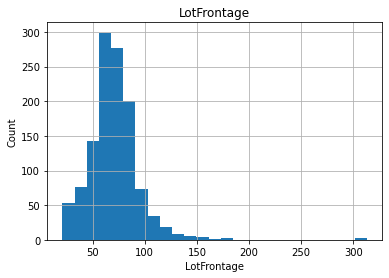

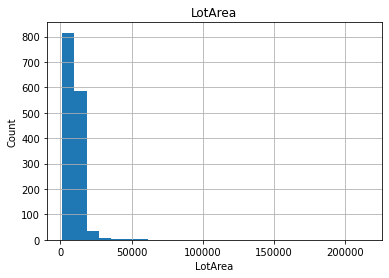

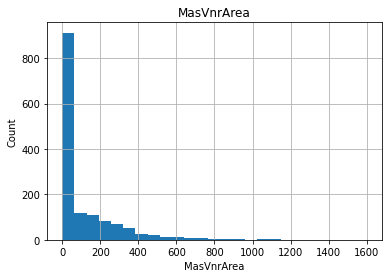

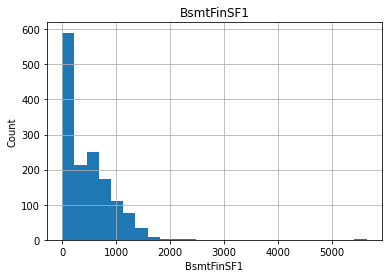

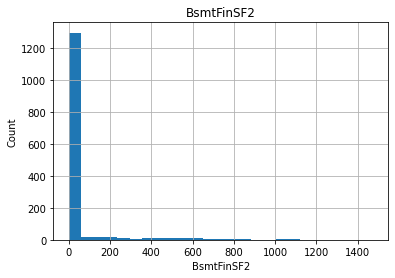

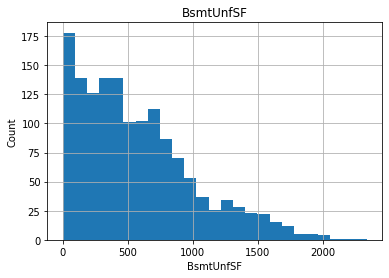

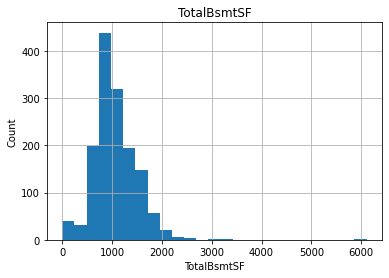

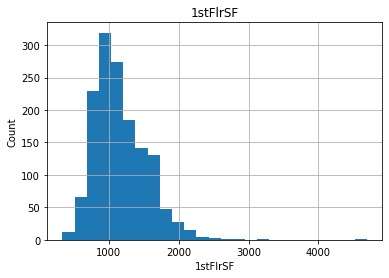

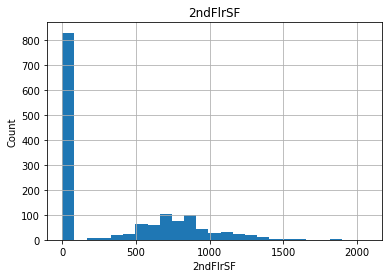

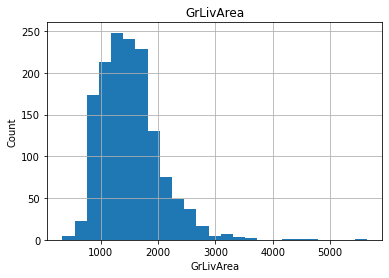

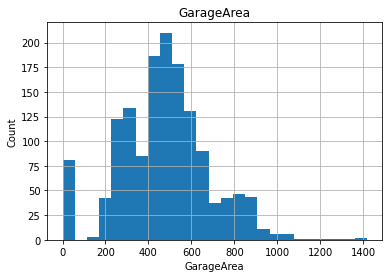

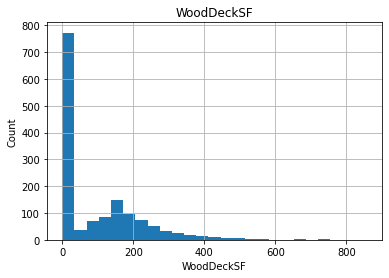

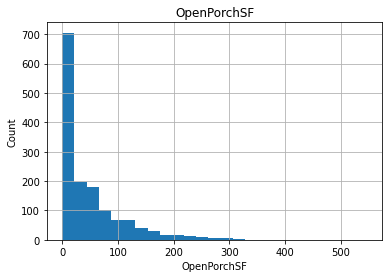

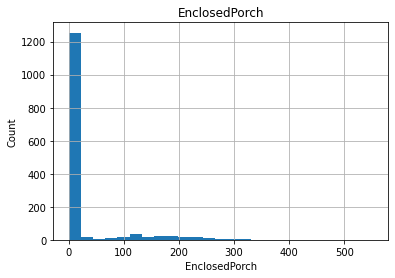

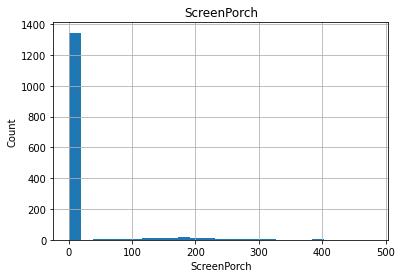

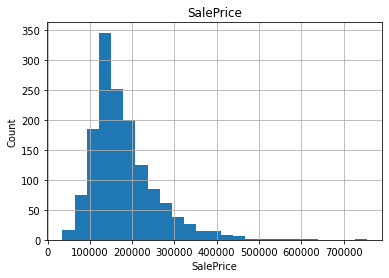

In [21]:
for feature in continuous_feature:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

    

#### We will be using Logarithmic Transformation

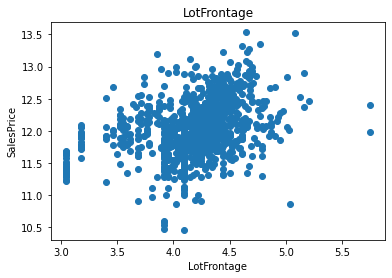

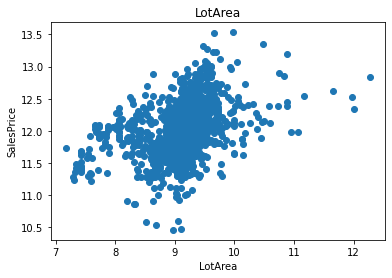

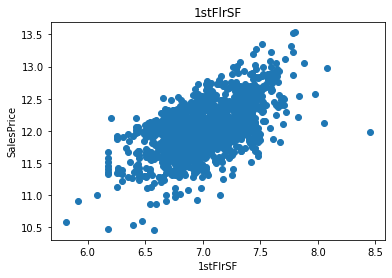

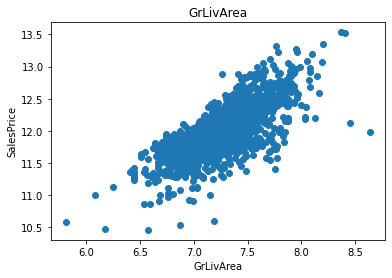

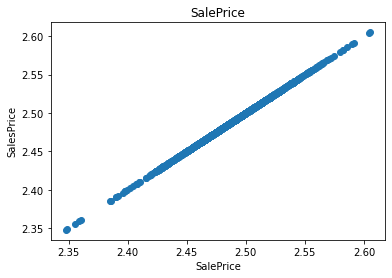

In [166]:

for feature in continuous_feature:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['SalePrice']=np.log(data['SalePrice'])
        plt.scatter(x=data[feature],y=data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalesPrice')
        plt.title(feature)
        plt.show()

In [22]:
df_copy = df.copy()

In [23]:
df_copy.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [24]:
df = df_copy

We can observe monotonic relationships b/w the continuous variables and the dependent variable

In [25]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Outliers

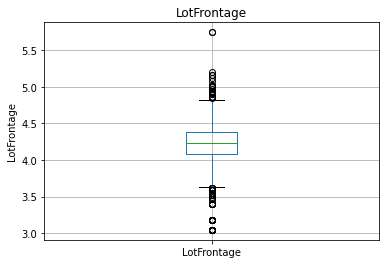

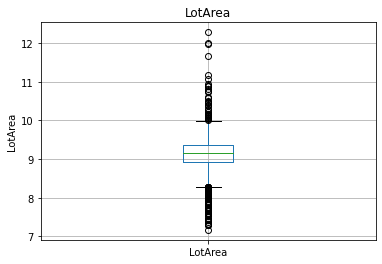

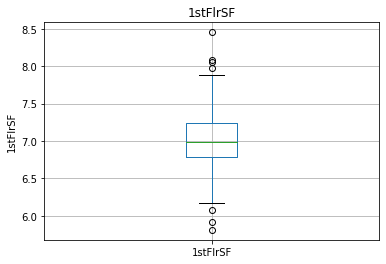

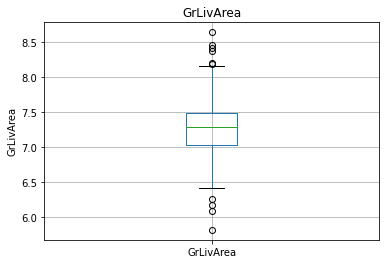

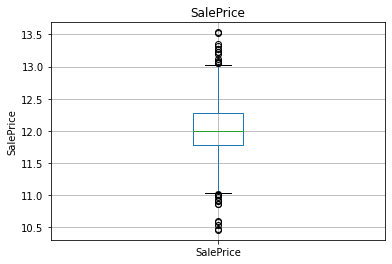

In [26]:
for feature in continuous_feature:
    data=df.copy()
    
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()             

In [27]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247694
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109011
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317167
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,11.849398
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,12.429216


In [28]:
data=df.copy()

In [29]:
continuous_feature

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

In [30]:
for feature in continuous_feature:
        IQR = np.percentile(df[feature],75) - np.percentile(df[feature],25)
        lb = np.percentile(df[feature],25)-IQR*1.5
        ub = np.percentile(df[feature],75)+IQR*1.5

        df[feature] = np.where(df[feature]>ub,ub,df[feature])
        df[feature] = np.where(df[feature]<lb,lb,df[feature])
        df[feature] = np.log1p(df[feature])
        
    

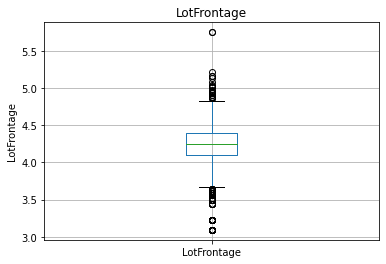

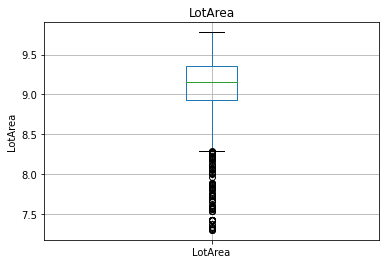

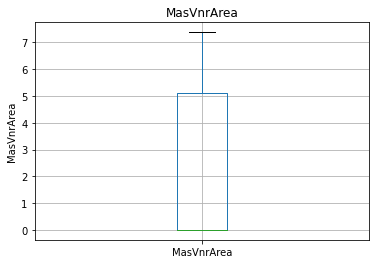

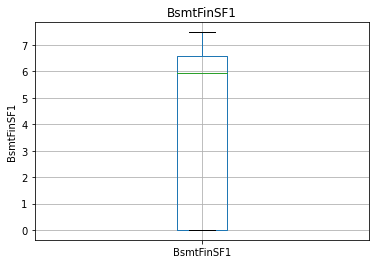

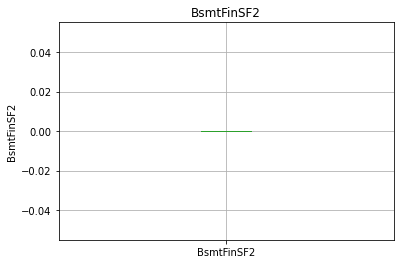

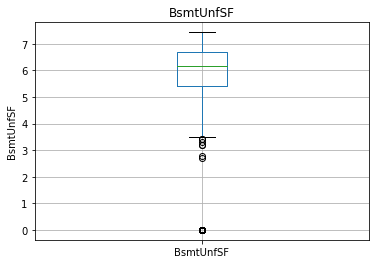

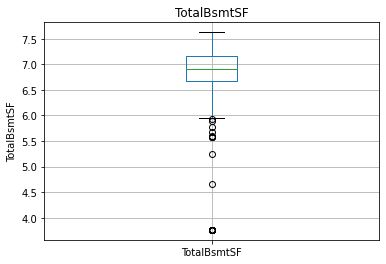

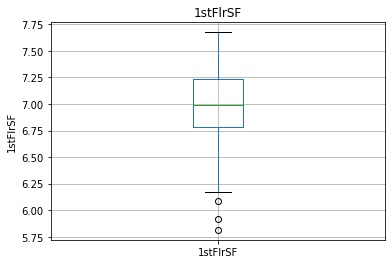

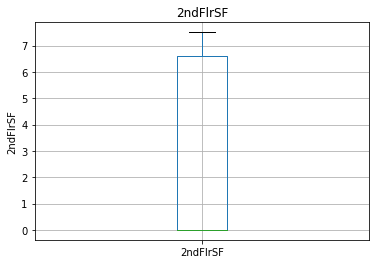

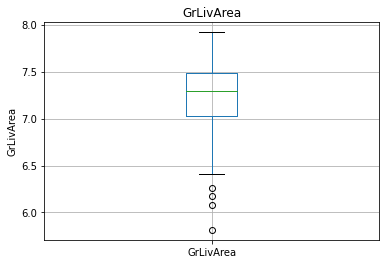

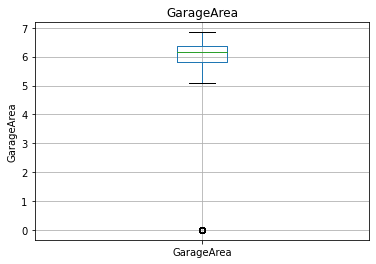

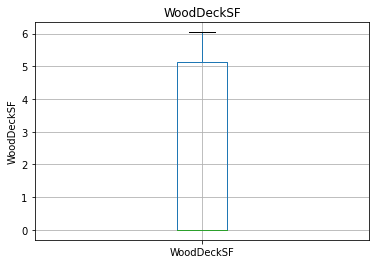

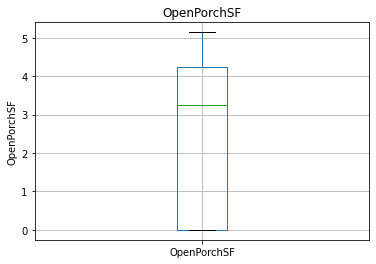

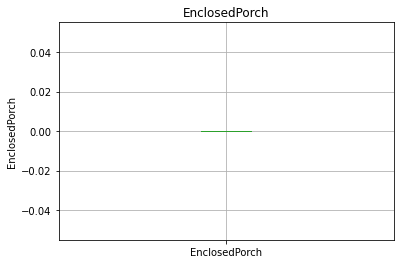

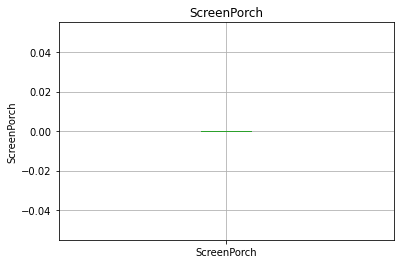

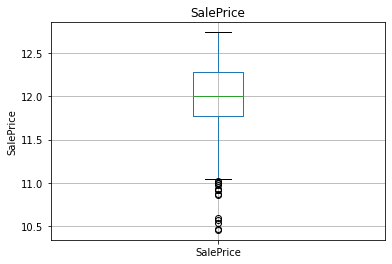

In [31]:
for feature in continuous_feature:
        df.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()     
    
    

<AxesSubplot:>

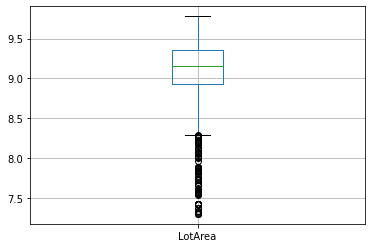

In [437]:
data.boxplot(column='LotArea')
#sns.boxplot(df['LotArea'])

In [32]:
continuous_feature

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

### Categorical Variables

In [33]:
categorical_features= [feature for feature in df.columns if df[feature].dtypes=='O']
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [34]:
df[categorical_features].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [35]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is MSZoning and number of categories are 5
The feature is Street and number of categories are 2
The feature is Alley and number of categories are 3
The feature is LotShape and number of categories are 4
The feature is LandContour and number of categories are 4
The feature is Utilities and number of categories are 2
The feature is LotConfig and number of categories are 5
The feature is LandSlope and number of categories are 3
The feature is Neighborhood and number of categories are 25
The feature is Condition1 and number of categories are 9
The feature is Condition2 and number of categories are 8
The feature is BldgType and number of categories are 5
The feature is HouseStyle and number of categories are 8
The feature is RoofStyle and number of categories are 6
The feature is RoofMatl and number of categories are 8
The feature is Exterior1st and number of categories are 15
The feature is Exterior2nd and number of categories are 16
The feature is MasVnrType and number of cate

In [132]:
l1

{'CollgCr': 150,
 'Veenker': 11,
 'Crawfor': 51,
 'NoRidge': 41,
 'Mitchel': 49,
 'Somerst': 86,
 'NWAmes': 73,
 'OldTown': 113,
 'BrkSide': 58,
 'Sawyer': 74,
 'NridgHt': 77,
 'NAmes': 225,
 'SawyerW': 59,
 'IDOTRR': 37,
 'MeadowV': 17,
 'Edwards': 100,
 'Timber': 38,
 'Gilbert': 79,
 'StoneBr': 25,
 'ClearCr': 28,
 'NPkVill': 9,
 'Blmngtn': 17,
 'BrDale': 16,
 'SWISU': 25,
 'Blueste': 2}

In [595]:
## Finding the relationship b/w Categorical features and the SalePrice

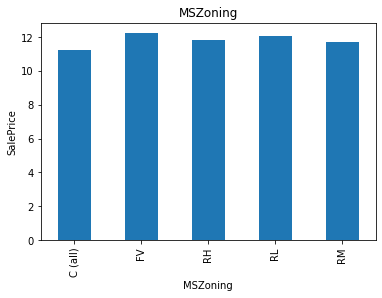

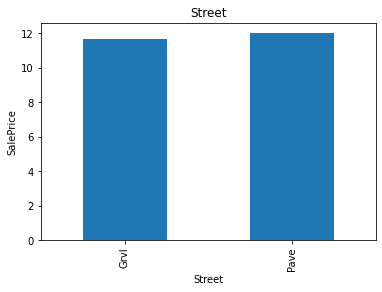

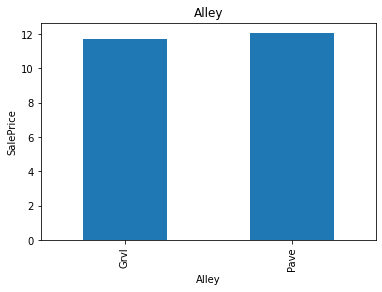

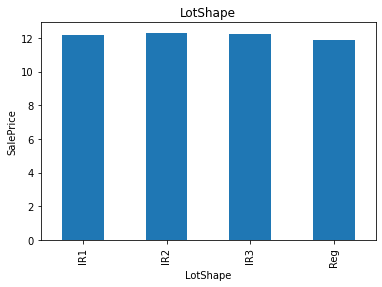

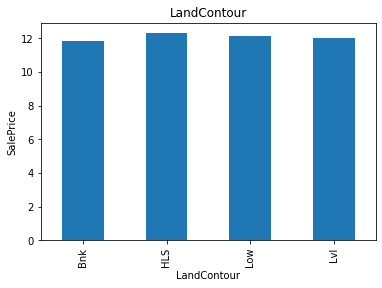

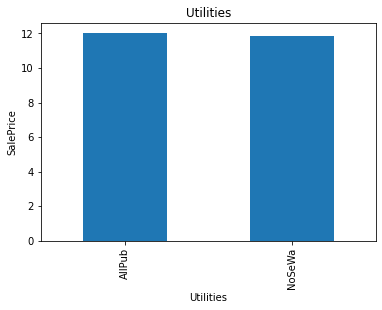

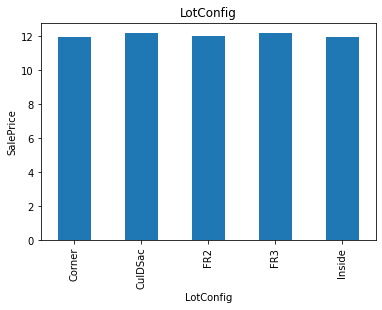

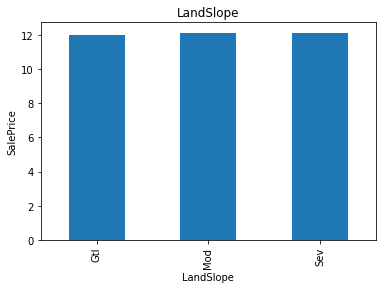

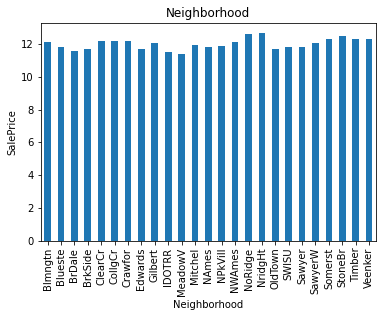

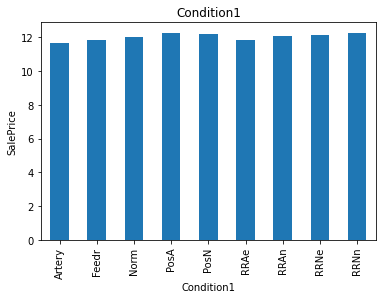

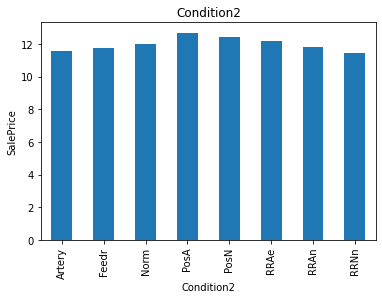

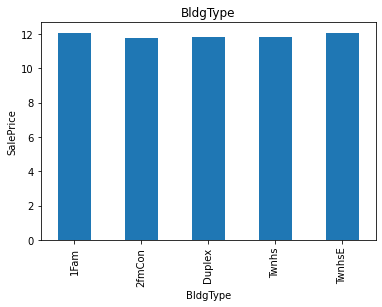

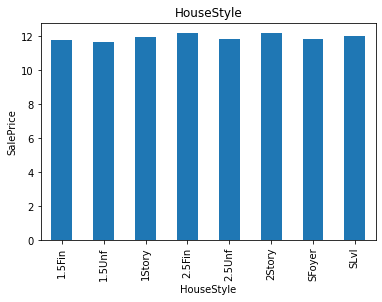

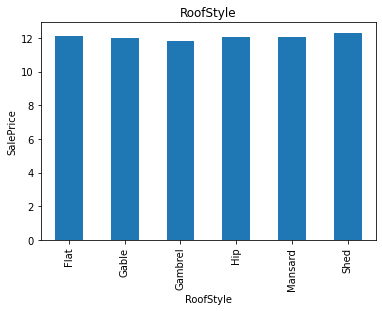

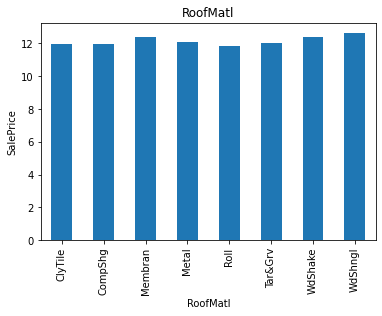

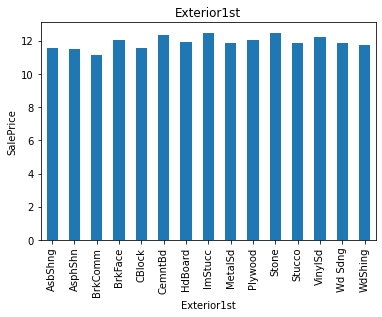

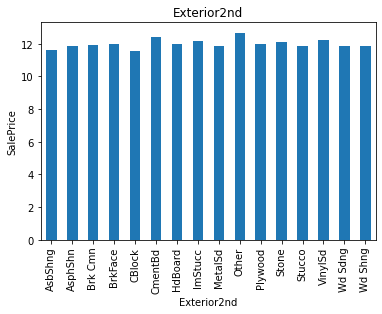

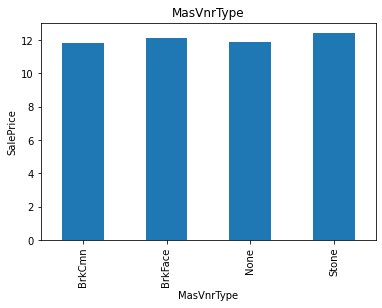

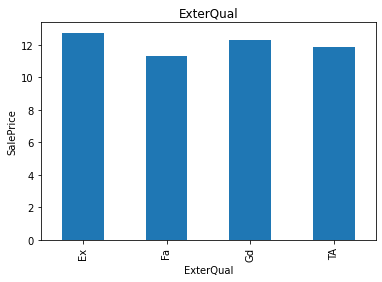

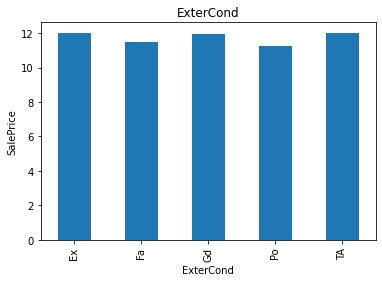

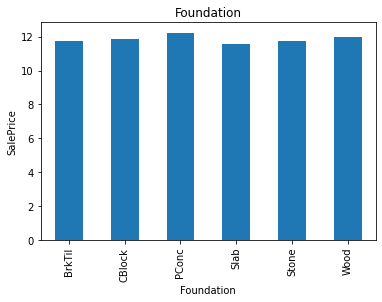

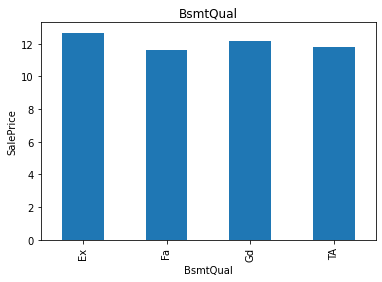

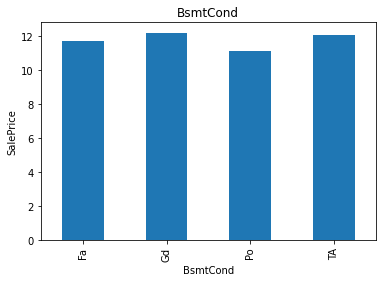

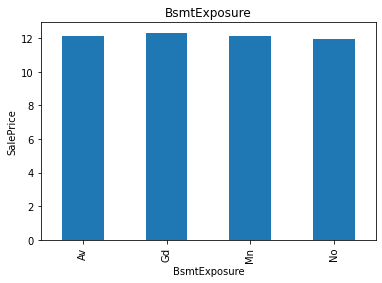

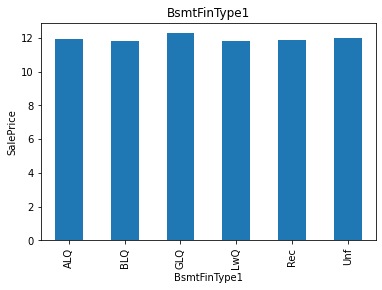

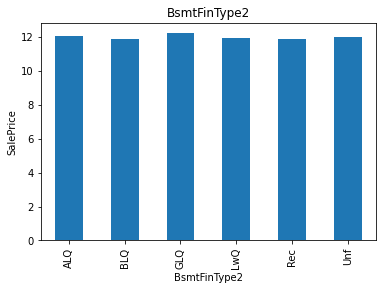

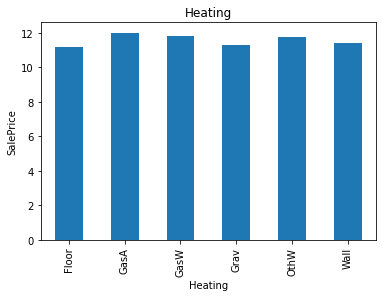

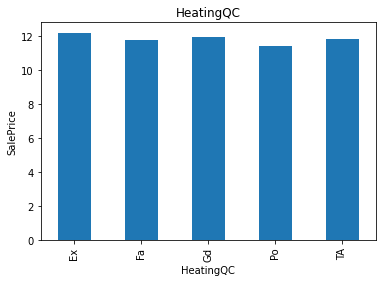

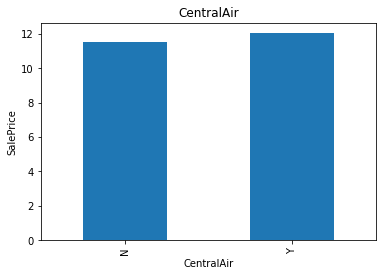

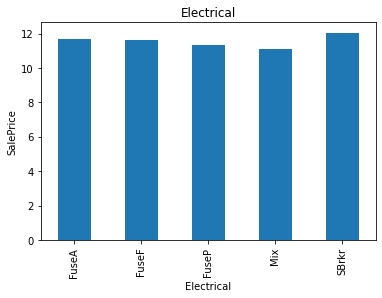

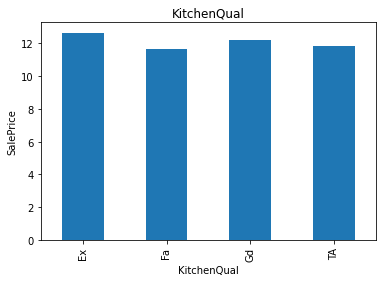

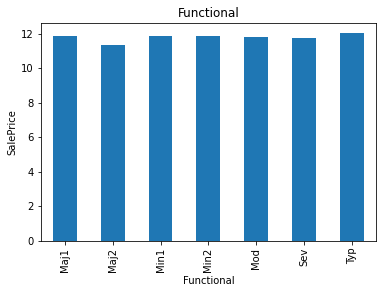

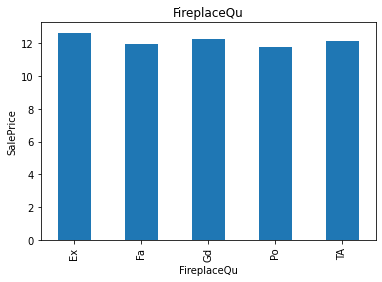

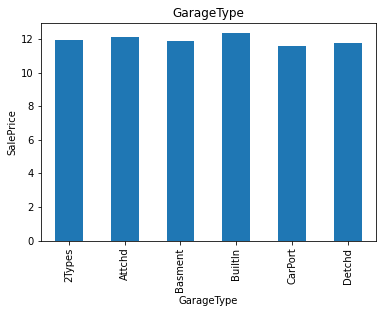

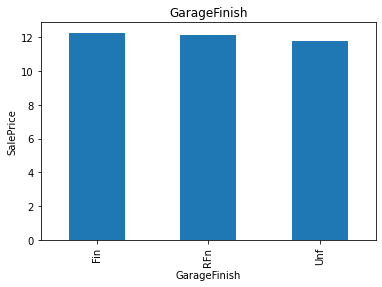

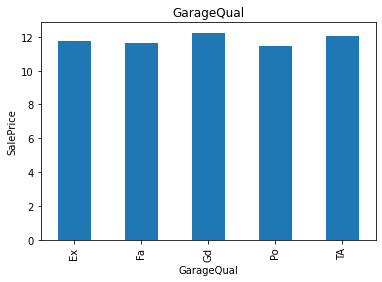

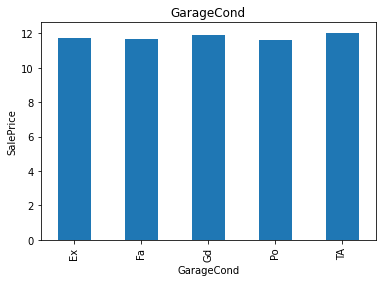

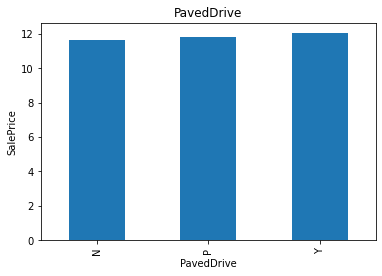

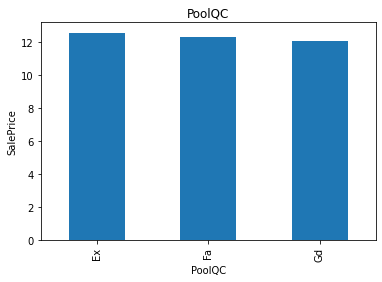

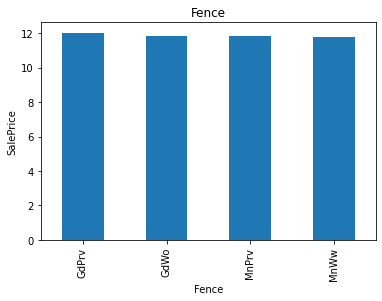

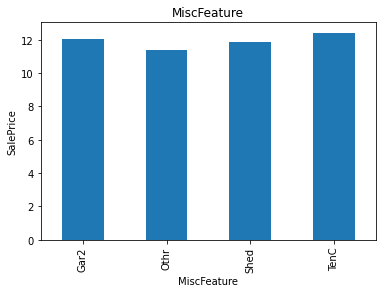

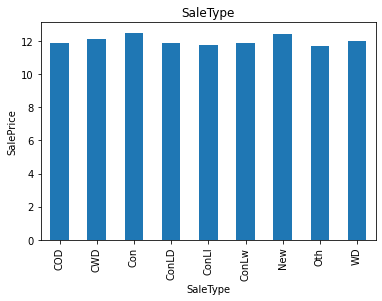

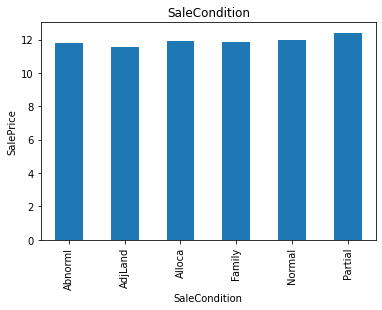

In [36]:
for feature in categorical_features:
    data=df.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

# Feature Engineering

We will be performing all the below steps in Feature Engineering:
1.Handling missing values
2.Handling Temporal variables
3.Handling Categorical variables: remove rare labels
4.Standardize the values of the variables to the same range

### Missing Values

In [37]:
## Let us capture all the nan values
## First lets handle Categorical features which are missing

features_nan= [feature for feature in df.columns if df[feature].dtypes=='O' and df[feature].isnull().sum()>=1]

for feature in features_nan:
    print('{}: {} missing values'.format(feature,np.round(df[feature].isnull().mean(),4)))

Alley: 0.9377 missing values
MasVnrType: 0.0055 missing values
BsmtQual: 0.0253 missing values
BsmtCond: 0.0253 missing values
BsmtExposure: 0.026 missing values
BsmtFinType1: 0.0253 missing values
BsmtFinType2: 0.026 missing values
Electrical: 0.0007 missing values
FireplaceQu: 0.4726 missing values
GarageType: 0.0555 missing values
GarageFinish: 0.0555 missing values
GarageQual: 0.0555 missing values
GarageCond: 0.0555 missing values
PoolQC: 0.9952 missing values
Fence: 0.8075 missing values
MiscFeature: 0.963 missing values


In [38]:
## Replace missing value with a new label
def replace_cat_feature(df,features_nan):
    data=df.copy()
    
    data[features_nan] = np.where(data[features_nan].isnull(),'Missing',data[features_nan])
    #data[features_nan]=data[features_nan].fillna('Missing')
    return data
df=replace_cat_feature(df,features_nan)

In [39]:
df[features_nan].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [40]:
df.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,4.189655,9.042040,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.283204,Gd,TA,PConc,Gd,TA,No,GLQ,6.561031,Unf,0.0,5.017280,6.753438,GasA,Ex,Y,SBrkr,6.753438,6.751101,0,7.444833,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,2003.0,RFn,2,6.308098,TA,TA,Y,0.000000,4.127134,0.0,0,0.0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,12.247699
1,2,20,RL,4.394449,9.169623,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000000,TA,TA,CBlock,Gd,TA,Gd,ALQ,6.886532,Unf,0.0,5.652489,7.141245,GasA,Ex,Y,SBrkr,7.141245,0.000000,0,7.141245,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,6.133398,TA,TA,Y,5.700444,0.000000,0.0,0,0.0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,12.109016
2,3,60,RL,4.234107,9.328212,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.093750,Gd,TA,PConc,Gd,TA,Mn,GLQ,6.188264,Unf,0.0,6.075346,6.825460,GasA,Ex,Y,SBrkr,6.825460,6.765039,0,7.488294,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,6.411818,TA,TA,Y,0.000000,3.761200,0.0,0,0.0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,12.317171
3,4,70,RL,4.110874,9.164401,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000000,TA,TA,BrkTil,TA,Gd,No,ALQ,5.379897,Unf,0.0,6.293419,6.629363,GasA,Gd,Y,SBrkr,6.869014,6.629363,0,7.448916,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,6.466145,TA,TA,Y,0.000000,3.583519,0.0,0,0.0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,11.849405
4,5,60,RL,4.442651,9.565284,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.860786,Gd,TA,PConc,Gd,TA,Av,GLQ,6.486161,Unf,0.0,6.196444,7.044033,GasA,Ex,Y,SBrkr,7.044033,6.960348,0,7.695758,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,6.729824,TA,TA,Y,5.262690,4.442651,0.0,0,0.0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,12.429220
5,6,50,RL,4.454347,9.555064,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.000000,TA,TA,Wood,Gd,TA,No,GLQ,6.597146,Unf,0.0,4.174387,6.680855,GasA,Ex,Y,SBrkr,6.680855,6.340359,0,7.217443,1,0,1,1,1,1,TA,5,Typ,0,Missing,Attchd,1993.0,Unf,2,6.175867,TA,TA,Y,3.713572,3.433987,0.0,320,0.0,0,Missing,MnPrv,Shed,700,10,2009,WD,Normal,11.870607
6,7,20,RL,4.330733,9.218804,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,5.231109,Gd,TA,PConc,Ex,TA,Av,GLQ,7.222566,Unf,0.0,5.762051,7.430707,GasA,Ex,Y,SBrkr,7.435438,0.000000,0,7.435438,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,6.456770,TA,TA,Y,5.545177,4.060443,0.0,0,0.0,0,Missing,Missing,Missing,0,8,2007,WD,Normal,12.634606
7,8,60,RL,NaN,9.247925,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,5.484797,TA,TA,CBlock,Gd,TA,Mn,ALQ,6.756932,BLQ,0.0,5.379897,7.010312,GasA,Ex,Y,SBrkr,7.010312,6.891626,0,7.645398,1,0,2,1,3,1,TA,7,Typ,2,TA,At

In [41]:
## Now lets check for numerical variables that contains missing values

numerical_with_nan=[feature for feature in df.columns if df[feature].isnull().sum()>=1 and df[feature].dtypes!='O']

## We will print the numerical nan variables and percentage of missing values

for feature in numerical_with_nan:
    print("{}: {}% missing value".format(feature,np.round(df[feature].isnull().mean()*100,4)))

LotFrontage: 17.7397% missing value
MasVnrArea: 0.5479% missing value
GarageYrBlt: 5.5479% missing value


In [42]:
#Replacing the numerical missing values
for feature in numerical_with_nan:
    ## We will replace by using median since there are outliers
    
    ## create a new feature to capture nan values
    df[feature+'nan'] = np.where(df[feature].isnull(),1,0)
    
    ## ## We will replace by using median since there are outliers
    df[feature].fillna(df[feature].median(),inplace=True)
    
df[numerical_with_nan].isnull().sum()    
    

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [43]:
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,RL,4.189655,9.042040,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.283204,Gd,TA,PConc,Gd,TA,No,GLQ,6.561031,Unf,0.0,5.017280,6.753438,GasA,Ex,Y,SBrkr,6.753438,6.751101,0,7.444833,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,2003.0,RFn,2,6.308098,TA,TA,Y,0.000000,4.127134,0.0,0,0.0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,12.247699,0,0,0
1,2,20,RL,4.394449,9.169623,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000000,TA,TA,CBlock,Gd,TA,Gd,ALQ,6.886532,Unf,0.0,5.652489,7.141245,GasA,Ex,Y,SBrkr,7.141245,0.000000,0,7.141245,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,6.133398,TA,TA,Y,5.700444,0.000000,0.0,0,0.0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,12.109016,0,0,0
2,3,60,RL,4.234107,9.328212,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.093750,Gd,TA,PConc,Gd,TA,Mn,GLQ,6.188264,Unf,0.0,6.075346,6.825460,GasA,Ex,Y,SBrkr,6.825460,6.765039,0,7.488294,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,6.411818,TA,TA,Y,0.000000,3.761200,0.0,0,0.0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,12.317171,0,0,0
3,4,70,RL,4.110874,9.164401,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000000,TA,TA,BrkTil,TA,Gd,No,ALQ,5.379897,Unf,0.0,6.293419,6.629363,GasA,Gd,Y,SBrkr,6.869014,6.629363,0,7.448916,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,6.466145,TA,TA,Y,0.000000,3.583519,0.0,0,0.0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,11.849405,0,0,0
4,5,60,RL,4.442651,9.565284,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.860786,Gd,TA,PConc,Gd,TA,Av,GLQ,6.486161,Unf,0.0,6.196444,7.044033,GasA,Ex,Y,SBrkr,7.044033,6.960348,0,7.695758,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,6.729824,TA,TA,Y,5.262690,4.442651,0.0,0,0.0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,12.429220,0,0,0
5,6,50,RL,4.454347,9.555064,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.000000,TA,TA,Wood,Gd,TA,No,GLQ,6.597146,Unf,0.0,4.174387,6.680855,GasA,Ex,Y,SBrkr,6.680855,6.340359,0,7.217443,1,0,1,1,1,1,TA,5,Typ,0,Missing,Attchd,1993.0,Unf,2,6.175867,TA,TA,Y,3.713572,3.433987,0.0,320,0.0,0,Missing,MnPrv,Shed,700,10,2009,WD,Normal,11.870607,0,0,0
6,7,20,RL,4.330733,9.218804,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,5.231109,Gd,TA,PConc,Ex,TA,Av,GLQ,7.222566,Unf,0.0,5.762051,7.430707,GasA,Ex,Y,SBrkr,7.435438,0.000000,0,7.435438,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,6.456770,TA,TA,Y,5.545177,4.060443,0.0,0,0.0,0,Missing,Missing,Missing,0,8,2007,WD,Normal,12.634606,0,0,0
7,8,60,RL,4.248495,9.247925,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,5.484797,TA,TA,CBlock,Gd,TA,Mn,ALQ,6.756932,BLQ,0.0,

In [44]:
## Temporal Variables (Date Time Variables)

for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
       
    df[feature]=df['YrSold']-df[feature]

In [45]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,RL,4.189655,9.042040,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.283204,Gd,TA,PConc,Gd,TA,No,GLQ,6.561031,Unf,0.0,5.017280,6.753438,GasA,Ex,Y,SBrkr,6.753438,6.751101,0,7.444833,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,5.0,RFn,2,6.308098,TA,TA,Y,0.000000,4.127134,0.0,0,0.0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,12.247699,0,0,0
1,2,20,RL,4.394449,9.169623,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.000000,TA,TA,CBlock,Gd,TA,Gd,ALQ,6.886532,Unf,0.0,5.652489,7.141245,GasA,Ex,Y,SBrkr,7.141245,0.000000,0,7.141245,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,6.133398,TA,TA,Y,5.700444,0.000000,0.0,0,0.0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,12.109016,0,0,0
2,3,60,RL,4.234107,9.328212,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.093750,Gd,TA,PConc,Gd,TA,Mn,GLQ,6.188264,Unf,0.0,6.075346,6.825460,GasA,Ex,Y,SBrkr,6.825460,6.765039,0,7.488294,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,6.411818,TA,TA,Y,0.000000,3.761200,0.0,0,0.0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,12.317171,0,0,0
3,4,70,RL,4.110874,9.164401,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000000,TA,TA,BrkTil,TA,Gd,No,ALQ,5.379897,Unf,0.0,6.293419,6.629363,GasA,Gd,Y,SBrkr,6.869014,6.629363,0,7.448916,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,6.466145,TA,TA,Y,0.000000,3.583519,0.0,0,0.0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,11.849405,0,0,0
4,5,60,RL,4.442651,9.565284,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.860786,Gd,TA,PConc,Gd,TA,Av,GLQ,6.486161,Unf,0.0,6.196444,7.044033,GasA,Ex,Y,SBrkr,7.044033,6.960348,0,7.695758,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,6.729824,TA,TA,Y,5.262690,4.442651,0.0,0,0.0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,12.429220,0,0,0


In [46]:
df[['YearBuilt','YearRemodAdd','GarageYrBlt']].head()

,YearBuilt,YearRemodAdd,GarageYrBlt
0,5,5,5.0
1,31,31,31.0
2,7,6,7.0
3,91,36,8.0
4,8,8,8.0


## Numerical Variables

Since the numerical variables are skewed, we will perform log normal distribution

In [47]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,RL,4.189655,9.042040,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.283204,Gd,TA,PConc,Gd,TA,No,GLQ,6.561031,Unf,0.0,5.017280,6.753438,GasA,Ex,Y,SBrkr,6.753438,6.751101,0,7.444833,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,5.0,RFn,2,6.308098,TA,TA,Y,0.000000,4.127134,0.0,0,0.0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,12.247699,0,0,0
1,2,20,RL,4.394449,9.169623,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.000000,TA,TA,CBlock,Gd,TA,Gd,ALQ,6.886532,Unf,0.0,5.652489,7.141245,GasA,Ex,Y,SBrkr,7.141245,0.000000,0,7.141245,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,6.133398,TA,TA,Y,5.700444,0.000000,0.0,0,0.0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,12.109016,0,0,0
2,3,60,RL,4.234107,9.328212,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.093750,Gd,TA,PConc,Gd,TA,Mn,GLQ,6.188264,Unf,0.0,6.075346,6.825460,GasA,Ex,Y,SBrkr,6.825460,6.765039,0,7.488294,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,6.411818,TA,TA,Y,0.000000,3.761200,0.0,0,0.0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,12.317171,0,0,0
3,4,70,RL,4.110874,9.164401,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000000,TA,TA,BrkTil,TA,Gd,No,ALQ,5.379897,Unf,0.0,6.293419,6.629363,GasA,Gd,Y,SBrkr,6.869014,6.629363,0,7.448916,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,6.466145,TA,TA,Y,0.000000,3.583519,0.0,0,0.0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,11.849405,0,0,0
4,5,60,RL,4.442651,9.565284,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.860786,Gd,TA,PConc,Gd,TA,Av,GLQ,6.486161,Unf,0.0,6.196444,7.044033,GasA,Ex,Y,SBrkr,7.044033,6.960348,0,7.695758,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,6.729824,TA,TA,Y,5.262690,4.442651,0.0,0,0.0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,12.429220,0,0,0


In [48]:
#Considering only non zero value features, as we're taking log
num_features=['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']

#for feature in num_features:
#    df[feature]=np.log(df[feature])
    

## Categorical Features 

In [49]:
categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']

In [50]:
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,RL,4.189655,9.042040,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.283204,Gd,TA,PConc,Gd,TA,No,GLQ,6.561031,Unf,0.0,5.017280,6.753438,GasA,Ex,Y,SBrkr,6.753438,6.751101,0,7.444833,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,5.0,RFn,2,6.308098,TA,TA,Y,0.000000,4.127134,0.0,0,0.0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,12.247699,0,0,0
1,2,20,RL,4.394449,9.169623,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.000000,TA,TA,CBlock,Gd,TA,Gd,ALQ,6.886532,Unf,0.0,5.652489,7.141245,GasA,Ex,Y,SBrkr,7.141245,0.000000,0,7.141245,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,6.133398,TA,TA,Y,5.700444,0.000000,0.0,0,0.0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,12.109016,0,0,0
2,3,60,RL,4.234107,9.328212,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.093750,Gd,TA,PConc,Gd,TA,Mn,GLQ,6.188264,Unf,0.0,6.075346,6.825460,GasA,Ex,Y,SBrkr,6.825460,6.765039,0,7.488294,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,6.411818,TA,TA,Y,0.000000,3.761200,0.0,0,0.0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,12.317171,0,0,0
3,4,70,RL,4.110874,9.164401,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000000,TA,TA,BrkTil,TA,Gd,No,ALQ,5.379897,Unf,0.0,6.293419,6.629363,GasA,Gd,Y,SBrkr,6.869014,6.629363,0,7.448916,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,6.466145,TA,TA,Y,0.000000,3.583519,0.0,0,0.0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,11.849405,0,0,0
4,5,60,RL,4.442651,9.565284,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.860786,Gd,TA,PConc,Gd,TA,Av,GLQ,6.486161,Unf,0.0,6.196444,7.044033,GasA,Ex,Y,SBrkr,7.044033,6.960348,0,7.695758,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,6.729824,TA,TA,Y,5.262690,4.442651,0.0,0,0.0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,12.429220,0,0,0


In [51]:
df[categorical_features]

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Missing,Attchd,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal
1,RL,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal
2,RL,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal
3,RL,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,Missing,Missing,Missing,WD,Abnorml
4,RL,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal
1456,RL,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,No,ALQ,Rec,GasA,TA,Y,SBrkr,TA,Min1,TA,Attchd,Unf,TA,TA,Y,Missing,MnPrv,Missing,WD,Normal
1457,RL,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,None,Ex,Gd,Stone,TA,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,Missing,GdPrv,Shed,WD,Normal
1458,RL,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,TA,TA,Mn,GLQ,Rec,GasA,Gd,Y,FuseA,Gd,Typ,Missing,Attchd,Unf,TA,TA,Y,Missing,Missing,Missing,WD,Normal


In [52]:
for feature in categorical_features:
    labels_ordered=df.groupby([feature])['SalePrice'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    df[feature]=df[feature].map(labels_ordered)
    #df2[feature]=df2[feature].map(labels_ordered)  # For test data as SalePrice column is not present 

In [53]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,3,4.189655,9.042040,1,2,0,1,1,0,0,15,3,4,3,7,7,5,5,5,1,2,12,14,2,5.283204,2,3,5,3,3,1,6,6.561031,5,0.0,5.017280,6.753438,5,4,1,5,6.753438,6.751101,0,7.444833,1,0,2,1,3,1,2,8,6,0,1,5,5.0,2,2,6.308098,3,5,2,0.000000,4.127134,0.0,0,0.0,0,0,3,2,0,2,2008,4,4,12.247699,0,0,0
1,2,20,3,4.394449,9.169623,1,2,0,1,1,2,0,20,1,4,3,4,6,8,31,31,1,2,6,6,1,0.000000,1,3,2,3,3,4,4,6.886532,5,0.0,5.652489,7.141245,5,4,1,5,7.141245,0.000000,0,7.141245,0,1,2,0,3,1,1,6,6,1,3,5,31.0,2,2,6.133398,3,5,2,5.700444,0.000000,0.0,0,0.0,0,0,3,2,0,5,2007,4,4,12.109016,0,0,0
2,3,60,3,4.234107,9.328212,1,2,1,1,1,0,0,15,3,4,3,7,7,5,7,6,1,2,12,14,2,5.093750,2,3,5,3,3,2,6,6.188264,5,0.0,6.075346,6.825460,5,4,1,5,6.825460,6.765039,0,7.488294,1,0,2,1,3,1,2,6,6,1,3,5,7.0,2,2,6.411818,3,5,2,0.000000,3.761200,0.0,0,0.0,0,0,3,2,0,9,2008,4,4,12.317171,0,0,0
3,4,70,3,4.110874,9.164401,1,2,1,1,1,1,0,17,3,4,3,7,7,5,91,36,1,2,4,7,1,0.000000,1,3,1,2,4,1,4,5.379897,5,0.0,6.293419,6.629363,5,3,1,5,6.869014,6.629363,0,7.448916,1,0,1,0,3,1,2,7,6,1,4,2,8.0,1,3,6.466145,3,5,2,0.000000,3.583519,0.0,0,0.0,0,0,3,2,0,2,2006,4,1,11.849405,0,0,0
4,5,60,3,4.442651,9.565284,1,2,1,1,1,2,0,24,3,4,3,7,8,5,8,8,1,2,12,14,2,5.860786,2,3,5,3,3,3,6,6.486161,5,0.0,6.196444,7.044033,5,4,1,5,7.044033,6.960348,0,7.695758,1,0,2,1,4,1,2,9,6,1,3,5,8.0,2,3,6.729824,3,5,2,5.262690,4.442651,0.0,0,0.0,0,0,3,2,0,12,2008,4,4,12.429220,0,0,0


In [54]:
len(df.columns)

84

### Feature Scaling

In [55]:
feature_scale=[feature for feature in df.columns if feature not in ['SalePrice','Id']]
len(feature_scale)

82

In [56]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(df[feature_scale])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [57]:
scaler.transform(df[feature_scale])

array([[0.23529412, 0.75      , 0.41326841, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.75      , 0.49030656, ..., 0.        , 0.        ,
        0.        ],
       [0.23529412, 0.75      , 0.42998996, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.29411765, 0.75      , 0.41892525, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.75      , 0.42998996, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.75      , 0.46633838, ..., 0.        , 0.        ,
        0.        ]])

In [58]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,3,4.189655,9.042040,1,2,0,1,1,0,0,15,3,4,3,7,7,5,5,5,1,2,12,14,2,5.283204,2,3,5,3,3,1,6,6.561031,5,0.0,5.017280,6.753438,5,4,1,5,6.753438,6.751101,0,7.444833,1,0,2,1,3,1,2,8,6,0,1,5,5.0,2,2,6.308098,3,5,2,0.000000,4.127134,0.0,0,0.0,0,0,3,2,0,2,2008,4,4,12.247699,0,0,0
1,2,20,3,4.394449,9.169623,1,2,0,1,1,2,0,20,1,4,3,4,6,8,31,31,1,2,6,6,1,0.000000,1,3,2,3,3,4,4,6.886532,5,0.0,5.652489,7.141245,5,4,1,5,7.141245,0.000000,0,7.141245,0,1,2,0,3,1,1,6,6,1,3,5,31.0,2,2,6.133398,3,5,2,5.700444,0.000000,0.0,0,0.0,0,0,3,2,0,5,2007,4,4,12.109016,0,0,0
2,3,60,3,4.234107,9.328212,1,2,1,1,1,0,0,15,3,4,3,7,7,5,7,6,1,2,12,14,2,5.093750,2,3,5,3,3,2,6,6.188264,5,0.0,6.075346,6.825460,5,4,1,5,6.825460,6.765039,0,7.488294,1,0,2,1,3,1,2,6,6,1,3,5,7.0,2,2,6.411818,3,5,2,0.000000,3.761200,0.0,0,0.0,0,0,3,2,0,9,2008,4,4,12.317171,0,0,0
3,4,70,3,4.110874,9.164401,1,2,1,1,1,1,0,17,3,4,3,7,7,5,91,36,1,2,4,7,1,0.000000,1,3,1,2,4,1,4,5.379897,5,0.0,6.293419,6.629363,5,3,1,5,6.869014,6.629363,0,7.448916,1,0,1,0,3,1,2,7,6,1,4,2,8.0,1,3,6.466145,3,5,2,0.000000,3.583519,0.0,0,0.0,0,0,3,2,0,2,2006,4,1,11.849405,0,0,0
4,5,60,3,4.442651,9.565284,1,2,1,1,1,2,0,24,3,4,3,7,8,5,8,8,1,2,12,14,2,5.860786,2,3,5,3,3,3,6,6.486161,5,0.0,6.196444,7.044033,5,4,1,5,7.044033,6.960348,0,7.695758,1,0,2,1,4,1,2,9,6,1,3,5,8.0,2,3,6.729824,3,5,2,5.262690,4.442651,0.0,0,0.0,0,0,3,2,0,12,2008,4,4,12.429220,0,0,0


In [59]:
#Transform the train and test set, and add on the Id and SalePrice variables
data = pd.concat([df[['Id','SalePrice']].reset_index(drop=True),
                  pd.DataFrame(scaler.transform(df[feature_scale]),
                               columns=feature_scale)],axis=1)

In [60]:
data.head(20)

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,12.247699,0.235294,0.75,0.413268,0.702292,1.0,1.0,0.000000,0.333333,1.0,0.00,0.0,0.625000,0.375,0.571429,0.75,1.000000,0.666667,0.500,0.036765,0.098361,0.2,0.285714,0.857143,0.933333,0.50,0.716038,0.666667,0.75,1.0,0.75,0.75,0.25,1.000000,0.876524,0.833333,0.0,0.675236,0.774017,1.0,1.00,1.0,1.0,0.504479,0.899291,0.0,0.774782,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.500000,1.000000,0.000000,0.2,0.833333,0.046729,0.666667,0.50,0.921552,0.6,1.0,1.0,0.000000,0.802685,0.0,0.000000,0.0,0.0,0.0,0.75,0.50,0.000000,0.090909,0.50,0.500,0.8,0.0,0.0,0.0
1,2,12.109016,0.000000,0.75,0.490307,0.753770,1.0,1.0,0.000000,0.333333,1.0,0.50,0.0,0.833333,0.125,0.571429,0.75,0.571429,0.555556,0.875,0.227941,0.524590,0.2,0.285714,0.428571,0.400000,0.25,0.000000,0.333333,0.75,0.4,0.75,0.75,1.00,0.666667,0.920010,0.833333,0.0,0.760724,0.874333,1.0,1.00,1.0,1.0,0.712760,0.000000,0.0,0.630540,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.333333,0.333333,1.000000,0.333333,0.6,0.833333,0.289720,0.666667,0.50,0.896030,0.6,1.0,1.0,0.943371,0.000000,0.0,0.000000,0.0,0.0,0.0,0.75,0.50,0.000000,0.363636,0.25,0.500,0.8,0.0,0.0,0.0
2,3,12.317171,0.235294,0.75,0.429990,0.817759,1.0,1.0,0.333333,0.333333,1.0,0.00,0.0,0.625000,0.375,0.571429,0.75,1.000000,0.666667,0.500,0.051471,0.114754,0.2,0.285714,0.857143,0.933333,0.50,0.690361,0.666667,0.75,1.0,0.75,0.75,0.50,1.000000,0.826724,0.833333,0.0,0.817633,0.792647,1.0,1.00,1.0,1.0,0.543160,0.901147,0.0,0.795431,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.333333,1.000000,0.333333,0.6,0.833333,0.065421,0.666667,0.50,0.936704,0.6,1.0,1.0,0.000000,0.731514,0.0,0.000000,0.0,0.0,0.0,0.75,0.50,0.000000,0.727273,0.50,0.500,0.8,0.0,0.0,0.0
3,4,11.849405,0.294118,0.75,0.383633,0.751663,1.0,1.0,0.333333,0.333333,1.0,0.25,0.0,0.708333,0.375,0.571429,0.75,1.000000,0.666667,0.500,0.669118,0.606557,0.2,0.285714,0.285714,0.466667,0.25,0.000000,0.333333,0.75,0.2,0.50,1.00,0.25,0.666667,0.718730,0.833333,0.0,0.846981,0.741922,1.0,0.75,1.0,1.0,0.566552,0.883074,0.0,0.776721,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.666667,0.416667,1.000000,0.333333,0.8,0.333333,0.074766,0.333333,0.75,0.944641,0.6,1.0,1.0,0.000000,0.696957,0.0,0.000000,0.0,0.0,0.0,0.75,0.50,0.000000,0.090909,0.00,0.500,0.2,0.0,0.0,0.0
4,5,12.429220,0.235294,0.75,0.508439,0.913414,1.0,1.0,0.333333,0.333333,1.0,0.50,0.0,1.000000,0.375,0.571429,0.75,1.000000,0.777778,0.500,0.058824,0.147541,0.2,0.285714,0.857143,0.933333,0.50,0.794318,0.666667,0.75,1.0,0.75,0.75,0.75,1.000000,0.866522,0.833333,0.0,0.833930,0.849186,1.0,1.00,1.0,1.0,0.660550,0.927164,0.0,0.894001,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.666667,0.583333,1.000000,0.333333,0.6,0.833333,0.074766,0.666667,0.75,0.983162,0.6,1.0,1.0,0.870927,0.864049,0.0,0.000000,0.0,0.0,0.0,0.75,0.50,0.000000,1.000000,0.50,0.500,0.8,0.0,0.0,0.0
5,6,11.870607,0.176471,0.75,0.512839,0.909290,1.0,1.0,0.333333,0.333333,1.0,0.00,0.0,0.458333,0.375,0.571429,0.75,0.285714,0.444444,0.500,0.117647,0.245902,0.2,0.285714,0.857143,0.933333,0.25,0.000000,0.333333,0.75,0.8,0.75,0.75,0.25,1.000000,0.881349,0.833333,0.0,0.561798,0.755241,1.

In [61]:
data.to_csv('X_train_outlier_removed_3.csv',index=False)

## Feature Selection

In [62]:
dataset=pd.read_csv('X_train_outlier_removed_3.csv')

In [63]:
dataset.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,12.247699,0.235294,0.75,0.413268,0.702292,1.0,1.0,0.000000,0.333333,1.0,0.00,0.0,0.625000,0.375,0.571429,0.75,1.000000,0.666667,0.500,0.036765,0.098361,0.2,0.285714,0.857143,0.933333,0.50,0.716038,0.666667,0.75,1.0,0.75,0.75,0.25,1.000000,0.876524,0.833333,0.0,0.675236,0.774017,1.0,1.00,1.0,1.0,0.504479,0.899291,0.0,0.774782,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.500000,1.0,0.000000,0.2,0.833333,0.046729,0.666667,0.50,0.921552,0.6,1.0,1.0,0.000000,0.802685,0.0,0.0,0.0,0.0,0.0,0.75,0.5,0.0,0.090909,0.50,0.5,0.8,0.0,0.0,0.0
1,2,12.109016,0.000000,0.75,0.490307,0.753770,1.0,1.0,0.000000,0.333333,1.0,0.50,0.0,0.833333,0.125,0.571429,0.75,0.571429,0.555556,0.875,0.227941,0.524590,0.2,0.285714,0.428571,0.400000,0.25,0.000000,0.333333,0.75,0.4,0.75,0.75,1.00,0.666667,0.920010,0.833333,0.0,0.760724,0.874333,1.0,1.00,1.0,1.0,0.712760,0.000000,0.0,0.630540,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.333333,0.333333,1.0,0.333333,0.6,0.833333,0.289720,0.666667,0.50,0.896030,0.6,1.0,1.0,0.943371,0.000000,0.0,0.0,0.0,0.0,0.0,0.75,0.5,0.0,0.363636,0.25,0.5,0.8,0.0,0.0,0.0
2,3,12.317171,0.235294,0.75,0.429990,0.817759,1.0,1.0,0.333333,0.333333,1.0,0.00,0.0,0.625000,0.375,0.571429,0.75,1.000000,0.666667,0.500,0.051471,0.114754,0.2,0.285714,0.857143,0.933333,0.50,0.690361,0.666667,0.75,1.0,0.75,0.75,0.50,1.000000,0.826724,0.833333,0.0,0.817633,0.792647,1.0,1.00,1.0,1.0,0.543160,0.901147,0.0,0.795431,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.333333,1.0,0.333333,0.6,0.833333,0.065421,0.666667,0.50,0.936704,0.6,1.0,1.0,0.000000,0.731514,0.0,0.0,0.0,0.0,0.0,0.75,0.5,0.0,0.727273,0.50,0.5,0.8,0.0,0.0,0.0
3,4,11.849405,0.294118,0.75,0.383633,0.751663,1.0,1.0,0.333333,0.333333,1.0,0.25,0.0,0.708333,0.375,0.571429,0.75,1.000000,0.666667,0.500,0.669118,0.606557,0.2,0.285714,0.285714,0.466667,0.25,0.000000,0.333333,0.75,0.2,0.50,1.00,0.25,0.666667,0.718730,0.833333,0.0,0.846981,0.741922,1.0,0.75,1.0,1.0,0.566552,0.883074,0.0,0.776721,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.333333,0.8,0.333333,0.074766,0.333333,0.75,0.944641,0.6,1.0,1.0,0.000000,0.696957,0.0,0.0,0.0,0.0,0.0,0.75,0.5,0.0,0.090909,0.00,0.5,0.2,0.0,0.0,0.0
4,5,12.429220,0.235294,0.75,0.508439,0.913414,1.0,1.0,0.333333,0.333333,1.0,0.50,0.0,1.000000,0.375,0.571429,0.75,1.000000,0.777778,0.500,0.058824,0.147541,0.2,0.285714,0.857143,0.933333,0.50,0.794318,0.666667,0.75,1.0,0.75,0.75,0.75,1.000000,0.866522,0.833333,0.0,0.833930,0.849186,1.0,1.00,1.0,1.0,0.660550,0.927164,0.0,0.894001,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.666667,0.583333,1.0,0.333333,0.6,0.833333,0.074766,0.666667,0.75,0.983162,0.6,1.0,1.0,0.870927,0.864049,0.0,0.0,0.0,0.0,0.0,0.75,0.5,0.0,1.000000,0.50,0.5,0.8,0.0,0.0,0.0


In [64]:
len(dataset.columns)

84

In [65]:
##Capture the dependent feature
y_train=dataset[['SalePrice']]

In [66]:
y_train

,SalePrice
0,12.247699
1,12.109016
2,12.317171
3,11.849405
4,12.429220
...,...
1455,12.072547
1456,12.254868
1457,12.493133
1458,11.864469


In [67]:
##Drop dependent feature from dataset
X_train=dataset.drop(['Id','SalePrice'],axis=1)

In [68]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

pd.pandas.set_option('display.max_columns',None)

In [69]:
### Apply Feature Selection
# first, I specify the Lasso Regression model, and I
# select a suitable alpha (equivalent of penalty).
# The bigger the alpha the less features that will be selected.

# Then I use the selectFromModel object from sklearn, which
# will select the features which coefficients are non-zero

feature_sel_model = SelectFromModel(Lasso(alpha=0.005,random_state=0))


In [70]:

feature_sel_model.fit(X_train,y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [71]:
feature_sel_model.get_support()

array([False, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False, False, False,  True, False,
       False,  True, False, False, False, False, False, False, False,
       False,  True,  True, False,  True, False,  True, False, False,
       False,  True, False,  True,  True, False,  True, False, False,
        True, False, False, False, False, False, False,  True, False,
       False, False,  True,  True, False,  True,  True, False, False,
        True, False,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False])

In [72]:
# let's print the number of total and selected features

selected_feat = X_train.columns[(feature_sel_model.get_support())]

#Let's print some stats
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(X_train.shape[1]-len(selected_feat)))

total features: 82
selected features: 22
features with coefficients shrank to zero: 60


In [73]:
selected_feat

Index(['LotArea', 'Neighborhood', 'OverallQual', 'YearRemodAdd', 'Foundation',
       'BsmtQual', 'BsmtExposure', 'BsmtFinSF1', 'TotalBsmtSF', 'HeatingQC',
       'CentralAir', '1stFlrSF', 'GrLivArea', 'KitchenQual', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageCars', 'GarageCond', 'WoodDeckSF',
       'OpenPorchSF', 'SaleCondition'],
      dtype='object')

In [74]:
X_train=X_train[selected_feat]

In [75]:
X_train.head()

,LotArea,Neighborhood,OverallQual,YearRemodAdd,Foundation,BsmtQual,BsmtExposure,BsmtFinSF1,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,GrLivArea,KitchenQual,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageCond,WoodDeckSF,OpenPorchSF,SaleCondition
0,0.702292,0.625000,0.666667,0.098361,1.0,0.75,0.25,0.876524,0.774017,1.00,1.0,0.504479,0.774782,0.666667,0.2,0.833333,0.666667,0.50,1.0,0.000000,0.802685,0.8
1,0.753770,0.833333,0.555556,0.524590,0.4,0.75,1.00,0.920010,0.874333,1.00,1.0,0.712760,0.630540,0.333333,0.6,0.833333,0.666667,0.50,1.0,0.943371,0.000000,0.8
2,0.817759,0.625000,0.666667,0.114754,1.0,0.75,0.50,0.826724,0.792647,1.00,1.0,0.543160,0.795431,0.666667,0.6,0.833333,0.666667,0.50,1.0,0.000000,0.731514,0.8
3,0.751663,0.708333,0.666667,0.606557,0.2,0.50,0.25,0.718730,0.741922,0.75,1.0,0.566552,0.776721,0.666667,0.8,0.333333,0.333333,0.75,1.0,0.000000,0.696957,0.2
4,0.913414,1.000000,0.777778,0.147541,1.0,0.75,0.75,0.866522,0.849186,1.00,1.0,0.660550,0.894001,0.666667,0.6,0.833333,0.666667,0.75,1.0,0.870927,0.864049,0.8


In [76]:
X_train.to_csv("X_train_.csv")

# Test Data

In [77]:
df2=pd.read_csv('test1.csv')

In [78]:
df2

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,Comp

In [79]:
#Checking percentage of nan values present
#Make the list of features with missing values
features_with_na= [feat for feat in df2.columns if df2[feat].isnull().sum()>=1]

#Print feature name and percentage of missung values
for feature in features_with_na:
    print(feature, np.round(df2[feature].isnull().mean(), 4),  ' % missing values')

MSZoning 0.0027  % missing values
LotFrontage 0.1556  % missing values
Alley 0.9267  % missing values
Utilities 0.0014  % missing values
Exterior1st 0.0007  % missing values
Exterior2nd 0.0007  % missing values
MasVnrType 0.011  % missing values
MasVnrArea 0.0103  % missing values
BsmtQual 0.0302  % missing values
BsmtCond 0.0308  % missing values
BsmtExposure 0.0302  % missing values
BsmtFinType1 0.0288  % missing values
BsmtFinSF1 0.0007  % missing values
BsmtFinType2 0.0288  % missing values
BsmtFinSF2 0.0007  % missing values
BsmtUnfSF 0.0007  % missing values
TotalBsmtSF 0.0007  % missing values
BsmtFullBath 0.0014  % missing values
BsmtHalfBath 0.0014  % missing values
KitchenQual 0.0007  % missing values
Functional 0.0014  % missing values
FireplaceQu 0.5003  % missing values
GarageType 0.0521  % missing values
GarageYrBlt 0.0535  % missing values
GarageFinish 0.0535  % missing values
GarageCars 0.0007  % missing values
GarageArea 0.0007  % missing values
GarageQual 0.0535  % mi

### Feature Engineering

In [80]:
## Let us capture all the nan values
## First lets handle Categorical features which are missing

features_nan= [feature for feature in df2.columns if df2[feature].dtypes=='O' and df2[feature].isnull().sum()>=1]

for feature in features_nan:
    print('{}: {} missing values'.format(feature,np.round(df2[feature].isnull().mean(),4)))

MSZoning: 0.0027 missing values
Alley: 0.9267 missing values
Utilities: 0.0014 missing values
Exterior1st: 0.0007 missing values
Exterior2nd: 0.0007 missing values
MasVnrType: 0.011 missing values
BsmtQual: 0.0302 missing values
BsmtCond: 0.0308 missing values
BsmtExposure: 0.0302 missing values
BsmtFinType1: 0.0288 missing values
BsmtFinType2: 0.0288 missing values
KitchenQual: 0.0007 missing values
Functional: 0.0014 missing values
FireplaceQu: 0.5003 missing values
GarageType: 0.0521 missing values
GarageFinish: 0.0535 missing values
GarageQual: 0.0535 missing values
GarageCond: 0.0535 missing values
PoolQC: 0.9979 missing values
Fence: 0.8012 missing values
MiscFeature: 0.965 missing values
SaleType: 0.0007 missing values


In [81]:
features_nan2= [feature for feature in df2.columns if df2[feature].dtypes==('float64'or'int64'or'int32'or'O') and df2[feature].isnull().sum()>=1]


In [82]:
features_nan2

['LotFrontage',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea']

In [83]:
## Replace missing value with a new label
def replace_cat_feature(df2,features_nan):
    data=df2.copy()
    
    data[features_nan] = np.where(data[features_nan].isnull(),'Missing',data[features_nan])
    #data[features_nan]=data[features_nan].fillna('Missing')
    return data
df2=replace_cat_feature(df2,features_nan)

In [84]:

df2[features_nan].isnull().sum()

MSZoning        0
Alley           0
Utilities       0
Exterior1st     0
Exterior2nd     0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
KitchenQual     0
Functional      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
SaleType        0
dtype: int64

In [85]:
df2.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,Missing,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,Missing,MnPrv,Missing,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,Missing,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,Missing,Missing,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,Missing,MnPrv,Missing,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,Missing,Missing,Missing,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,Missing,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,Missing,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,Missing,Missing,Missing,0,1,2010,WD,Normal


In [86]:
## Now lets check for numerical variables that contains missing values

numerical_with_nan=[feature for feature in df2.columns if df2[feature].isnull().sum()>=1 and df2[feature].dtypes!='O']

## We will print the numerical nan variables and percentage of missing values

for feature in numerical_with_nan:
    print("{}: {}% missing value".format(feature,np.round(df2[feature].isnull().mean()*100,4)))

LotFrontage: 15.5586% missing value
MasVnrArea: 1.0281% missing value
BsmtFinSF1: 0.0685% missing value
BsmtFinSF2: 0.0685% missing value
BsmtUnfSF: 0.0685% missing value
TotalBsmtSF: 0.0685% missing value
BsmtFullBath: 0.1371% missing value
BsmtHalfBath: 0.1371% missing value
GarageYrBlt: 5.3461% missing value
GarageCars: 0.0685% missing value
GarageArea: 0.0685% missing value


In [87]:
#Replacing the numerical missing values
for feature in numerical_with_nan:
    ## We will replace by using median since there are outliers
    
    ## create a new feature to capture nan values
    df2[feature+'nan'] = np.where(df2[feature].isnull(),1,0)
    
    ## ## We will replace by using median since there are outliers
    df2[feature].fillna(df2[feature].median(),inplace=True)
    
df2[numerical_with_nan].isnull().sum()    
    

LotFrontage     0
MasVnrArea      0
BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
GarageYrBlt     0
GarageCars      0
GarageArea      0
dtype: int64

In [88]:
#For temporal_feature
temporal_feat= [feature for feature in df2.columns if 'Year' in feature or 'Yr'in feature] 
temporal_feat

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold', 'GarageYrBltnan']

In [89]:
## Temporal Variables (Date Time Variables)

for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
       
    df2[feature]=df2['YrSold']-df2[feature]

In [90]:
df2.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,BsmtFinSF1nan,BsmtFinSF2nan,BsmtUnfSFnan,TotalBsmtSFnan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan,GarageCarsnan,GarageAreanan
0,1461,20,RH,80.0,11622,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,49,49,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,Missing,Attchd,49.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,Missing,MnPrv,Missing,0,6,2010,WD,Normal,0,0,0,0,0,0,0,0,0,0,0
1,1462,20,RL,81.0,14267,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,52,52,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,Missing,Attchd,52.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,Missing,Missing,Gar2,12500,6,2010,WD,Normal,0,0,0,0,0,0,0,0,0,0,0
2,1463,60,RL,74.0,13830,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,13,12,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,13.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,Missing,MnPrv,Missing,0,3,2010,WD,Normal,0,0,0,0,0,0,0,0,0,0,0
3,1464,60,RL,78.0,9978,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,12,12,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,12.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,Missing,Missing,Missing,0,6,2010,WD,Normal,0,0,0,0,0,0,0,0,0,0,0
4,1465,120,RL,43.0,5005,Pave,Missing,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,18,18,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,Missing,Attchd,18.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,Missing,Missing,Missing,0,1,2010,WD,Normal,0,0,0,0,0,0,0,0,0,0,0


In [91]:
df2[['YearBuilt','YearRemodAdd','GarageYrBlt']].head()

,YearBuilt,YearRemodAdd,GarageYrBlt
0,49,49,49.0
1,52,52,52.0
2,13,12,13.0
3,12,12,12.0
4,18,18,18.0


In [92]:
for feature in categorical_features:
    df3=pd.read_csv('train1.csv')
    df3[feature]=np.where(df3[feature].isnull(),'Missing',df3[feature])
    labels_ordered=df3.groupby([feature])['SalePrice'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    df2[feature]=df2[feature].map(labels_ordered)  # For test data as SalePrice column is not present 

In [93]:
df2

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,BsmtFinSF1nan,BsmtFinSF2nan,BsmtUnfSFnan,TotalBsmtSFnan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan,GarageCarsnan,GarageAreanan
0,1461,20,2.0,80.0,11622,1,2,0,1,1.0,0,0,10,2,4,4,5,5,6,49,49,1,2,11.0,12.0,1,0.0,1,3,2,2,3,1,1,468.0,2,144.0,270.0,882.0,5,2,1,5,896,0,0,896,0.0,0.0,1,0,2,1,1.0,5,6.0,0,1,5,49.0,1,1.0,730.0,3,5,2,140,0,0,0,120,0,0,2,3,0,6,2010,4.0,4,0,0,0,0,0,0,0,0,0,0,0
1,1462,20,3.0,81.0,14267,1,2,1,1,1.0,2,0,10,4,4,4,5,6,6,52,52,4,2,5.0,4.0,2,108.0,1,3,2,2,3,1,4,923.0,5,0.0,406.0,1329.0,5,2,1,5,1329,0,0,1329,0.0,0.0,1,1,3,1,2.0,6,6.0,0,1,5,52.0,1,1.0,312.0,3,5,2,393,36,0,0,0,0,0,4,2,12500,6,2010,4.0,4,0,0,0,0,0,0,0,0,0,0,0
2,1463,60,3.0,74.0,13830,1,2,1,1,1.0,0,0,14,4,4,4,6,5,5,13,12,1,2,11.0,12.0,1,0.0,1,3,5,3,3,1,6,791.0,5,0.0,137.0,928.0,5,3,1,5,928,701,0,1629,0.0,0.0,2,1,3,1,1.0,6,6.0,1,3,5,13.0,3,2.0,482.0,3,5,2,212,34,0,0,0,0,0,2,3,0,3,2010,4.0,4,0,0,0,0,0,0,0,0,0,0,0
3,1464,60,3.0,78.0,9978,1,2,1,1,1.0,0,0,14,4,4,4,6,6,6,12,12,1,2,11.0,12.0,2,20.0,1,3,5,2,3,1,6,602.0,5,0.0,324.0,926.0,5,4,1,5,926,678,0,1604,0.0,0.0,2,1,3,1,2.0,7,6.0,1,4,5,12.0,3,2.0,470.0,3,5,2,360,36,0,0,0,0,0,4,3,0,6,2010,4.0,4,0,0,0,0,0,0,0,0,0,0,0
4,1465,120,3.0,43.0,5005,1,2,1,3,1.0,0,0,22,4,4,3,5,8,5,18,18,1,2,8.0,9.0,1,0.0,2,3,5,3,3,1,4,263.0,5,0.0,1017.0,1280.0,5,4,1,5,1280,0,0,1280,0.0,0.0,2,0,2,1,2.0,5,6.0,0,1,5,18.0,2,2.0,506.0,3,5,2,0,82,0,0,144,0,0,4,3,0,1,2010,4.0,4,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,1.0,21.0,1936,1,2,0,1,1.0,0,0,0,4,4,2,6,4,7,36,36,1,2,12.0,13.0,1,0.0,1,3,2,2,3,1,5,0.0,5,0.0,546.0,546.0,5,3,1,5,546,546,0,1092,0.0,0.0,1,1,3,1,1.0,5,6.0,0,1,0,27.0,0,0.0,0.0,1,0,2,0,0,0,0,0,0,0,4,3,0,6,2006,4.0,4,0,0,0,0,0,0,0,0,1,0,0
1455,2916,160,1.0,21.0,1894,1,2,0,1,1.0,0,0,0,4,4,3,6,4,5,36,36,1,2,12.0,13.0,1,0.0,1,3,2,2,3,1,1,252.0,5,0.0,294.0,546.0,5,2,1,5,546,546,0,1092,0.0,0.0,1,1,3,1,1.0,6,6.0,0,1,1,36.0,1,1.0,286.0,3,5,2,0,24,0,0,0,0,0,4,3,0,4,2006,4.0,1,0,0,0,0,0,0,0,0,0,0,0
1456,2917,20,3.0,160.0,20000,1,2,0,1,1.0,0,0,11,4,4,4,5,5,7,46,10,1,2,11.0,12.0,1,0.0,1,3,2,2,3,1,4,1224.0,5,0.0,0.0,1224.0,5,4,1,5,1224,0,0,1224,1.0,0.0,1,0,4,1,1.0,7,6.0,1,3,2,46.0,1,2.0,576.0,3,5,2,474,0,0,0,0,0,0,4,3,0,9,2006,4.0,1,0,0,0,0,0,0,0,0,0,0,0
1457,2918,85,3.0,62.0,10441,1,2,0,1,1.0,0,0,11,4,4,4,1,5,5,14,14,1,2,8.0,8.0,1,0.0,1,3,5,3,3,3,6,337.0,5,0.0,575.0,912.0,5,2,1,5,970,0,0,970,0.0,1.0,1,0,3,1,1.0,6,6.0,0,1,0,27.0,0,0.0,0.0,1,0,2,80,32,0,0,0,0,0,2,1,700,7,2006,4.0,4,0,0,0,0,0,0,0,0,1,0,0


### Missing Values

In [94]:
## Let us capture all the nan values
## First lets handle Categorical features which are missing

features_nan= [feature for feature in df2.columns if df2[feature].dtypes=='O' and df2[feature].isnull().sum()>=1]



In [95]:
continuous_feature

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

In [96]:
continuous_feature.append('SalePrice')

In [97]:
continuous_feature

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice',
 'SalePrice']

In [103]:
continuous_feature.remove('SalePrice')

In [104]:
continuous_feature

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch']

In [105]:
continuous_feature_test = continuous_feature

In [266]:
continuous_feature_test

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch']

In [269]:
df3

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,BsmtFinSF1nan,BsmtFinSF2nan,BsmtUnfSFnan,TotalBsmtSFnan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan,GarageCarsnan,GarageAreanan
0,1461,20,2.0,1.685370,2.338024,1,2,0,1,1.0,0,0,10,2,4,4,5,5,6,49,49,1,2,11.0,12.0,1,0.000000,1,3,2,2,3,1,1,1.967197,2,0.0,1.887391,2.051984,5,2,1,5,2.054003,0.000000,0,2.054003,0.0,0.0,1,0,2,1,1.0,5,6.0,0,1,5,49.0,1,1.0,2.027413,3,5,2,1.783183,0.000000,0.0,0,0.0,0,0,2,3,0,6,2010,4.0,4,0,0,0,0,0,0,0,0,0,0,0
1,1462,20,3.0,1.687642,2.357620,1,2,1,1,1.0,2,0,10,4,4,4,5,6,6,52,52,4,2,5.0,4.0,2,1.738947,1,3,2,2,3,1,4,2.057798,5,0.0,1.947168,2.103272,5,2,1,5,2.103272,0.000000,0,2.103272,0.0,0.0,1,1,3,1,2.0,6,6.0,0,1,5,52.0,1,1.0,1.908980,3,5,2,1.942526,1.528427,0.0,0,0.0,0,0,4,2,12500,6,2010,4.0,4,0,0,0,0,0,0,0,0,0,0,0
2,1463,60,3.0,1.671001,2.354672,1,2,1,1,1.0,0,0,14,4,4,4,6,5,5,13,12,1,2,11.0,12.0,1,0.000000,1,3,5,3,3,1,6,2.037911,5,0.0,1.779561,2.058487,5,3,1,5,2.058487,2.022068,0,2.127795,0.0,0.0,2,1,3,1,1.0,6,6.0,1,3,5,13.0,3,2.0,1.971302,3,5,2,1.850232,1.516302,0.0,0,0.0,0,0,2,3,0,3,2010,4.0,4,0,0,0,0,0,0,0,0,0,0,0
3,1464,60,3.0,1.680725,2.323195,1,2,1,1,1.0,0,0,14,4,4,4,6,6,6,12,12,1,2,11.0,12.0,2,1.397363,1,3,5,2,3,1,6,2.001739,5,0.0,1.914541,2.058212,5,4,1,5,2.058212,2.017649,0,2.125953,0.0,0.0,2,1,3,1,2.0,7,6.0,1,4,5,12.0,3,2.0,1.967792,3,5,2,1.929908,1.528427,0.0,0,0.0,0,0,4,3,0,6,2010,4.0,4,0,0,0,0,0,0,0,0,0,0,0
4,1465,120,3.0,1.565317,2.253226,1,2,1,3,1.0,0,0,22,4,4,3,5,8,5,18,18,1,2,8.0,9.0,1,0.000000,2,3,5,3,3,1,4,1.883419,5,0.0,2.070097,2.098680,5,4,1,5,2.098680,0.000000,0,2.098680,0.0,0.0,2,0,2,1,2.0,5,6.0,0,1,5,18.0,2,2.0,1.978033,3,5,2,0.000000,1.689882,0.0,0,0.0,0,0,4,3,0,1,2010,4.0,4,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,1.0,1.552447,2.223847,1,2,0,1,1.0,0,0,0,4,4,2,6,4,7,36,36,1,2,12.0,13.0,1,0.000000,1,3,2,2,3,1,5,0.000000,5,0.0,1.988484,1.988484,5,3,1,5,1.988484,1.988484,0,2.079027,0.0,0.0,1,1,3,1,1.0,5,6.0,0,1,0,27.0,0,0.0,1.770913,1,0,2,0.000000,0.000000,0.0,0,0.0,0,0,4,3,0,6,2006,4.0,4,0,0,0,0,0,0,0,0,1,0,0
1455,2916,160,1.0,1.552447,2.223847,1,2,0,1,1.0,0,0,0,4,4,3,6,4,5,36,36,1,2,12.0,13.0,1,0.000000,1,3,2,2,3,1,1,1.876926,5,0.0,1.900162,1.988484,5,2,1,5,1.988484,1.988484,0,2.079027,0.0,0.0,1,1,3,1,1.0,6,6.0,0,1,1,36.0,1,1.0,1.896042,3,5,2,0.000000,1.439569,0.0,0,0.0,0,0,4,3,0,4,2006,4.0,1,0,0,0,0,0,0,0,0,0,0,0
1456,2917,20,3.0,1.734031,2.377858,1,2,0,1,1.0,0,0,11,4,4,4,5,5,7,46,10,1,2,11.0,12.0,1,0.000000,1,3,2,2,3,1,4,2.093184,5,0.0,1.496412,2.093184,5,4,1,5,2.093184,0.000000,0,2.093184,1.0,0.0,1,0,4,1,1.0,7,6.0,1,3,2,46.0,1,2.0,1.995767,3,5,2,1.951982,0.000000,0.0,0,0.0,0,0,4,3,0,9,2006,4.0,1,0,0,0,0,0,0,0,0,0,0,0
1457,2918,85,3.0,1.637663,2.327628,1,2,0,1,1.0,0,0,11,4,4,4,1,5,5,14,14,1,2,8.0,8.0,1,0.000000,1,3,5,3,3,3,6,1.920306,5,0.0,1.995531,2.056267,5,

In [107]:
for feature in continuous_feature_test:
    IQR = np.percentile(df2[feature],75) - np.percentile(df2[feature],25)
    lb = np.percentile(df2[feature],25)-IQR*1.5
    ub = np.percentile(df2[feature],75)+IQR*1.5

    df2[feature] = np.where(df2[feature]>ub,ub,df2[feature])
    df2[feature] = np.where(df2[feature]<lb,lb,df2[feature])
    df2[feature] = np.log1p(df2[feature])

In [270]:
outlier_dict = dict()
for feature in continuous_feature_test:
    IQR = np.percentile(df4[feature],75) - np.percentile(df4[feature],25)
    lb = np.percentile(df4[feature],25)-IQR*1.5
    ub = np.percentile(df4[feature],75)+IQR*1.5

    df4[feature] = np.where(df4[feature]>ub,ub,df4[feature])
    df4[feature] = np.where(df4[feature]<lb,lb,df4[feature])
    df4[feature] = np.log1p(df4[feature])
    
    dict_feature = dict()
    
    dict_feature['IQR'] = IQR
    dict_feature['Lower_bound'] = lb
    dict_feature['Upper_bound'] = ub
    
    outlier_dict[feature] = dict_feature
    

In [276]:
outlier_dict_percentile = dict()
for feature in continuous_feature_test:
    percentile_99th = np.percentile(df4[feature],99) 
    percentile_1st = np.percentile(df4[feature],1)
    median_value = df[feature].median()

    #df4[feature] = np.where(df4[feature]>ub,ub,df4[feature])
    #df4[feature] = np.where(df4[feature]<lb,lb,df4[feature])
    #df4[feature] = np.log1p(df4[feature])
    
    dict_feature_percentile = dict()
    
    dict_feature_percentile['1st'] = percentile_1st
    dict_feature_percentile['99th'] = percentile_99th
    dict_feature_percentile['Median'] = median_value
    
    outlier_dict_percentile[feature] = dict_feature_percentile

In [313]:
outlier_dict

{'LotFrontage': {'IQR': 0.04935468226831574,
  'Lower_bound': 1.5573383767939242,
  'Upper_bound': 1.7547571058671871},
 'LotArea': {'IQR': 0.04379367920570498,
  'Lower_bound': 2.2276674956502895,
  'Upper_bound': 2.4028422124731095},
 'MasVnrArea': {'IQR': 1.807263688716924,
  'Lower_bound': -2.710895533075386,
  'Upper_bound': 4.51815922179231},
 'BsmtFinSF1': {'IQR': 2.0313085443910763,
  'Lower_bound': -3.0469628165866145,
  'Upper_bound': 5.078271360977691},
 'BsmtFinSF2': {'IQR': 0.0, 'Lower_bound': 0.0, 'Upper_bound': 0.0},
 'BsmtUnfSF': {'IQR': 0.18331923565035124,
  'Lower_bound': 1.5806774813803603,
  'Upper_bound': 2.313954423981765},
 'TotalBsmtSF': {'IQR': 0.06419941643668414,
  'Lower_bound': 1.9404545836622826,
  'Upper_bound': 2.1972522494090194},
 '1stFlrSF': {'IQR': 0.057334072754528176,
  'Lower_bound': 1.9647389718441362,
  'Upper_bound': 2.194075262862249},
 '2ndFlrSF': {'IQR': 2.0172564188484525,
  'Lower_bound': -3.025884628272679,
  'Upper_bound': 5.04314104712

In [277]:
outlier_dict_percentile

{'LotFrontage': {'1st': 0.9389670210672053,
  '99th': 1.005777194524828,
  'Median': 4.248495242049359},
 'LotArea': {'1st': 1.1717597387980652,
  '99th': 1.2172418461444838,
  'Median': 9.156886838722746},
 'MasVnrArea': {'1st': 0.0, '99th': 1.080725717331393, 'Median': 0.0},
 'BsmtFinSF1': {'1st': 0.0,
  '99th': 1.1415626429333063,
  'Median': 5.951942943437755},
 'BsmtFinSF2': {'1st': 0.0, '99th': 0.0, 'Median': 0.0},
 'BsmtUnfSF': {'1st': 0.9480519541451999,
  '99th': 1.1411474047821348,
  'Median': 6.170651297395139},
 'TotalBsmtSF': {'1st': 1.0785641896913982,
  '99th': 1.1495254945144728,
  'Median': 6.900226885665022},
 '1stFlrSF': {'1st': 1.0916336887769167,
  '99th': 1.1505971766270453,
  'Median': 6.992096005027085},
 '2ndFlrSF': {'1st': 0.0, '99th': 1.1339307567244956, 'Median': 0.0},
 'GrLivArea': {'1st': 1.1040865573224683,
  '99th': 1.1578527534077312,
  'Median': 7.289610521451167},
 'GarageArea': {'1st': 1.0245444885448576,
  '99th': 1.1194590497357892,
  'Median': 6.1

In [272]:
np.save('outlier_dict.npy', outlier_dict)

In [273]:
outlier_dict = np.load('outlier_dict.npy',allow_pickle='TRUE').item()

In [274]:
outlier_dict

{'LotFrontage': {'IQR': 0.04935468226831574,
  'Lower_bound': 1.5573383767939242,
  'Upper_bound': 1.7547571058671871},
 'LotArea': {'IQR': 0.04379367920570498,
  'Lower_bound': 2.2276674956502895,
  'Upper_bound': 2.4028422124731095},
 'MasVnrArea': {'IQR': 1.807263688716924,
  'Lower_bound': -2.710895533075386,
  'Upper_bound': 4.51815922179231},
 'BsmtFinSF1': {'IQR': 2.0313085443910763,
  'Lower_bound': -3.0469628165866145,
  'Upper_bound': 5.078271360977691},
 'BsmtFinSF2': {'IQR': 0.0, 'Lower_bound': 0.0, 'Upper_bound': 0.0},
 'BsmtUnfSF': {'IQR': 0.18331923565035124,
  'Lower_bound': 1.5806774813803603,
  'Upper_bound': 2.313954423981765},
 'TotalBsmtSF': {'IQR': 0.06419941643668414,
  'Lower_bound': 1.9404545836622826,
  'Upper_bound': 2.1972522494090194},
 '1stFlrSF': {'IQR': 0.057334072754528176,
  'Lower_bound': 1.9647389718441362,
  'Upper_bound': 2.194075262862249},
 '2ndFlrSF': {'IQR': 2.0172564188484525,
  'Lower_bound': -3.025884628272679,
  'Upper_bound': 5.04314104712

In [311]:
df5 = scaler.transform(entry.values)

In [312]:
df5

array([[ 0.23529412,  0.75      , -0.79284434, -2.46147135,  1.        ,
         1.        ,  0.33333333,  0.33333333,  1.        ,  0.5       ,
         0.        ,  0.58333333,  0.5       ,  0.57142857,  1.        ,
         0.85714286,  0.55555556,  0.5       ,  0.125     ,  0.27868852,
         0.2       ,  0.28571429,  0.57142857,  0.6       ,  0.25      ,
         0.        ,  0.33333333,  0.75      ,  1.        ,  0.75      ,
         0.75      ,  0.25      ,  0.83333333,  0.        ,  0.83333333,
         0.        ,  0.14933515, -0.68589666,  1.        ,  0.75      ,
         1.        ,  1.        , -2.52667414,  0.14869381,  0.        ,
        -2.22033716,  0.        ,  0.        ,  0.66666667,  0.5       ,
         0.375     ,  0.33333333,  0.33333333,  0.41666667,  1.        ,
         0.33333333,  0.6       ,  0.83333333,  0.1588785 ,  1.        ,
         0.5       ,  0.15846407,  0.6       ,  1.        ,  1.        ,
         0.17051883,  0.19276367,  0.        ,  0. 

In [310]:
entry = entry[feature_scale]

In [308]:
len(entry[feature_scale].columns)

82

In [304]:
entry = pd.DataFrame(df4.iloc[5:10],columns = df4.columns)

In [307]:
X_train

,LotArea,Neighborhood,OverallQual,YearRemodAdd,Foundation,BsmtQual,BsmtExposure,BsmtFinSF1,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,GrLivArea,KitchenQual,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageCond,WoodDeckSF,OpenPorchSF,SaleCondition
0,0.702292,0.625000,0.666667,0.098361,1.0,0.75,0.25,0.876524,0.774017,1.00,1.0,0.504479,0.774782,0.666667,0.2,0.833333,0.666667,0.50,1.0,0.000000,0.802685,0.8
1,0.753770,0.833333,0.555556,0.524590,0.4,0.75,1.00,0.920010,0.874333,1.00,1.0,0.712760,0.630540,0.333333,0.6,0.833333,0.666667,0.50,1.0,0.943371,0.000000,0.8
2,0.817759,0.625000,0.666667,0.114754,1.0,0.75,0.50,0.826724,0.792647,1.00,1.0,0.543160,0.795431,0.666667,0.6,0.833333,0.666667,0.50,1.0,0.000000,0.731514,0.8
3,0.751663,0.708333,0.666667,0.606557,0.2,0.50,0.25,0.718730,0.741922,0.75,1.0,0.566552,0.776721,0.666667,0.8,0.333333,0.333333,0.75,1.0,0.000000,0.696957,0.2
4,0.913414,1.000000,0.777778,0.147541,1.0,0.75,0.75,0.866522,0.849186,1.00,1.0,0.660550,0.894001,0.666667,0.6,0.833333,0.666667,0.75,1.0,0.870927,0.864049,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.676006,0.583333,0.555556,0.131148,1.0,0.75,0.25,0.000000,0.801753,1.00,1.0,0.562067,0.756957,0.333333,0.6,0.833333,0.666667,0.50,1.0,0.000000,0.722251,0.8
1456,0.881485,0.541667,0.555556,0.377049,0.4,0.75,0.25,0.891523,0.926129,0.50,1.0,0.979143,0.866196,0.333333,0.6,0.833333,0.333333,0.50,1.0,0.969434,0.000000,0.8
1457,0.729610,0.708333,0.666667,0.081967,0.6,0.50,0.25,0.750860,0.850761,1.00,1.0,0.680333,0.923732,0.666667,0.8,0.833333,0.666667,0.25,1.0,0.000000,0.799522,0.8
1458,0.758657,0.416667,0.444444,0.245902,0.4,0.50,0.50,0.522629,0.833603,0.75,1.0,0.628195,0.555730,0.666667,0.2,0.833333,0.333333,0.25,1.0,0.977283,0.000000,0.8


In [262]:
df4 = df3

In [263]:
df2

,LotArea,Neighborhood,OverallQual,YearRemodAdd,Foundation,BsmtQual,BsmtExposure,BsmtFinSF1,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,GrLivArea,KitchenQual,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageCond,WoodDeckSF,OpenPorchSF,SaleCondition
0,2.338024,10,5,49,2,2,1,1.967197,2.051984,2,1,2.054003,2.054003,1.0,1,5,1,1.0,5,1.783183,0.000000,4
1,2.357620,10,6,52,2,2,1,2.057798,2.103272,2,1,2.103272,2.103272,2.0,1,5,1,1.0,5,1.942526,1.528427,4
2,2.354672,14,5,12,5,3,1,2.037911,2.058487,3,1,2.058487,2.127795,1.0,3,5,3,2.0,5,1.850232,1.516302,4
3,2.323195,14,6,12,5,2,1,2.001739,2.058212,4,1,2.058212,2.125953,2.0,4,5,3,2.0,5,1.929908,1.528427,4
4,2.253226,22,8,18,5,3,1,1.883419,2.098680,4,1,2.098680,2.098680,2.0,1,5,2,2.0,5,0.000000,1.689882,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2.223847,0,4,36,2,2,1,0.000000,1.988484,3,1,1.988484,2.079027,1.0,1,0,0,0.0,0,0.000000,0.000000,4
1455,2.223847,0,4,36,2,2,1,1.876926,1.988484,2,1,1.988484,2.079027,1.0,1,1,1,1.0,5,0.000000,1.439569,1
1456,2.377858,11,5,10,2,2,1,2.093184,2.093184,4,1,2.093184,2.093184,1.0,3,2,1,2.0,5,1.951982,0.000000,1
1457,2.327628,11,5,14,5,3,3,1.920306,2.056267,2,1,2.064116,2.064116,1.0,1,0,0,0.0,0,1.685370,1.503301,4


In [164]:
#Numerical Variables
#Since the numerical variables are skewed, we will perform log normal distribution

In [191]:
num_features=['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea']
#for feature in num_features:
    #df2[feature]=np.log(df2[feature])

In [108]:
df2.shape

(1459, 91)

In [109]:
## Replace missing value with a new label
def replace_cat_feature(df,features_nan):
    data=df.copy()
    
    data[features_nan] = np.where(data[features_nan].isnull(),'Missing',data[features_nan])
    #data[features_nan]=data[features_nan].fillna('Missing')
    return data
df2=replace_cat_feature(df2,features_nan)

In [110]:
## Let us capture all the nan values
## First lets handle Categorical features which are missing

features_nan= [feature for feature in df2.columns if df2[feature].dtypes=='O' and df2[feature].isnull().sum()>=1]

for feature in features_nan:
    print('{}: {} missing values'.format(feature,np.round(df2[feature].isnull().mean(),4)))

In [111]:
df2.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,BsmtFinSF1nan,BsmtFinSF2nan,BsmtUnfSFnan,TotalBsmtSFnan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan,GarageCarsnan,GarageAreanan
0,1461,20,2.0,1.685370,2.338024,1,2,0,1,1.0,0,0,10,2,4,4,5,5,6,49,49,1,2,11.0,12.0,1,0.000000,1,3,2,2,3,1,1,1.967197,2,0.0,1.887391,2.051984,5,2,1,5,2.054003,0.000000,0,2.054003,0.0,0.0,1,0,2,1,1.0,5,6.0,0,1,5,49.0,1,1.0,2.027413,3,5,2,1.783183,0.000000,0.0,0,0.0,0,0,2,3,0,6,2010,4.0,4,0,0,0,0,0,0,0,0,0,0,0
1,1462,20,3.0,1.687642,2.357620,1,2,1,1,1.0,2,0,10,4,4,4,5,6,6,52,52,4,2,5.0,4.0,2,1.738947,1,3,2,2,3,1,4,2.057798,5,0.0,1.947168,2.103272,5,2,1,5,2.103272,0.000000,0,2.103272,0.0,0.0,1,1,3,1,2.0,6,6.0,0,1,5,52.0,1,1.0,1.908980,3,5,2,1.942526,1.528427,0.0,0,0.0,0,0,4,2,12500,6,2010,4.0,4,0,0,0,0,0,0,0,0,0,0,0
2,1463,60,3.0,1.671001,2.354672,1,2,1,1,1.0,0,0,14,4,4,4,6,5,5,13,12,1,2,11.0,12.0,1,0.000000,1,3,5,3,3,1,6,2.037911,5,0.0,1.779561,2.058487,5,3,1,5,2.058487,2.022068,0,2.127795,0.0,0.0,2,1,3,1,1.0,6,6.0,1,3,5,13.0,3,2.0,1.971302,3,5,2,1.850232,1.516302,0.0,0,0.0,0,0,2,3,0,3,2010,4.0,4,0,0,0,0,0,0,0,0,0,0,0
3,1464,60,3.0,1.680725,2.323195,1,2,1,1,1.0,0,0,14,4,4,4,6,6,6,12,12,1,2,11.0,12.0,2,1.397363,1,3,5,2,3,1,6,2.001739,5,0.0,1.914541,2.058212,5,4,1,5,2.058212,2.017649,0,2.125953,0.0,0.0,2,1,3,1,2.0,7,6.0,1,4,5,12.0,3,2.0,1.967792,3,5,2,1.929908,1.528427,0.0,0,0.0,0,0,4,3,0,6,2010,4.0,4,0,0,0,0,0,0,0,0,0,0,0
4,1465,120,3.0,1.565317,2.253226,1,2,1,3,1.0,0,0,22,4,4,3,5,8,5,18,18,1,2,8.0,9.0,1,0.000000,2,3,5,3,3,1,4,1.883419,5,0.0,2.070097,2.098680,5,4,1,5,2.098680,0.000000,0,2.098680,0.0,0.0,2,0,2,1,2.0,5,6.0,0,1,5,18.0,2,2.0,1.978033,3,5,2,0.000000,1.689882,0.0,0,0.0,0,0,4,3,0,1,2010,4.0,4,0,0,0,0,0,0,0,0,0,0,0


In [112]:
df2.to_csv('test_outlier_removed',index=False)

# Prediciton and selecting the Algorithm


In [113]:
import xgboost
regressor=xgboost.XGBRegressor()


C:\Users\Hp\Anaconda3\lib\site-packages\dask\dataframe\utils.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [114]:
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]


In [115]:
## Hyper Parameter Optimization


n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [116]:

# Set up the random search with 4-fold cross validation
from sklearn.model_selection import RandomizedSearchCV
#from sklearn.base import clone
# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)


In [117]:
random_cv.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   13.3s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:   56.0s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  1.4min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:  1.9min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_...
                   iid='deprecated', n_iter=50, n_jobs=4,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['gbt

In [185]:
random_cv.best_estimator_


XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=2,
             min_child_weight=4, missing=nan, monotone_constraints='()',
             n_estimators=900, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [119]:
random_cv.best_params_


{'n_estimators': 900,
 'min_child_weight': 4,
 'max_depth': 2,
 'learning_rate': 0.05,
 'booster': 'gbtree',
 'base_score': 0.25}

In [120]:
regressor=xgboost.XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=2,
             min_child_weight=4, missing=None, monotone_constraints='()',
             n_estimators=900, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1)

In [121]:
regressor.fit(X_train,y_train)


XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=2,
             min_child_weight=4, missing=None, monotone_constraints='()',
             n_estimators=900, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [152]:
df2 = pd.read_csv('test_outlier_removed')

In [153]:
df3=df2.copy()

In [167]:
df3

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,BsmtFinSF1nan,BsmtFinSF2nan,BsmtUnfSFnan,TotalBsmtSFnan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan,GarageCarsnan,GarageAreanan
0,1461,20,2.0,1.685370,2.338024,1,2,0,1,1.0,0,0,10,2,4,4,5,5,6,49,49,1,2,11.0,12.0,1,0.000000,1,3,2,2,3,1,1,1.967197,2,0.0,1.887391,2.051984,5,2,1,5,2.054003,0.000000,0,2.054003,0.0,0.0,1,0,2,1,1.0,5,6.0,0,1,5,49.0,1,1.0,2.027413,3,5,2,1.783183,0.000000,0.0,0,0.0,0,0,2,3,0,6,2010,4.0,4,0,0,0,0,0,0,0,0,0,0,0
1,1462,20,3.0,1.687642,2.357620,1,2,1,1,1.0,2,0,10,4,4,4,5,6,6,52,52,4,2,5.0,4.0,2,1.738947,1,3,2,2,3,1,4,2.057798,5,0.0,1.947168,2.103272,5,2,1,5,2.103272,0.000000,0,2.103272,0.0,0.0,1,1,3,1,2.0,6,6.0,0,1,5,52.0,1,1.0,1.908980,3,5,2,1.942526,1.528427,0.0,0,0.0,0,0,4,2,12500,6,2010,4.0,4,0,0,0,0,0,0,0,0,0,0,0
2,1463,60,3.0,1.671001,2.354672,1,2,1,1,1.0,0,0,14,4,4,4,6,5,5,13,12,1,2,11.0,12.0,1,0.000000,1,3,5,3,3,1,6,2.037911,5,0.0,1.779561,2.058487,5,3,1,5,2.058487,2.022068,0,2.127795,0.0,0.0,2,1,3,1,1.0,6,6.0,1,3,5,13.0,3,2.0,1.971302,3,5,2,1.850232,1.516302,0.0,0,0.0,0,0,2,3,0,3,2010,4.0,4,0,0,0,0,0,0,0,0,0,0,0
3,1464,60,3.0,1.680725,2.323195,1,2,1,1,1.0,0,0,14,4,4,4,6,6,6,12,12,1,2,11.0,12.0,2,1.397363,1,3,5,2,3,1,6,2.001739,5,0.0,1.914541,2.058212,5,4,1,5,2.058212,2.017649,0,2.125953,0.0,0.0,2,1,3,1,2.0,7,6.0,1,4,5,12.0,3,2.0,1.967792,3,5,2,1.929908,1.528427,0.0,0,0.0,0,0,4,3,0,6,2010,4.0,4,0,0,0,0,0,0,0,0,0,0,0
4,1465,120,3.0,1.565317,2.253226,1,2,1,3,1.0,0,0,22,4,4,3,5,8,5,18,18,1,2,8.0,9.0,1,0.000000,2,3,5,3,3,1,4,1.883419,5,0.0,2.070097,2.098680,5,4,1,5,2.098680,0.000000,0,2.098680,0.0,0.0,2,0,2,1,2.0,5,6.0,0,1,5,18.0,2,2.0,1.978033,3,5,2,0.000000,1.689882,0.0,0,0.0,0,0,4,3,0,1,2010,4.0,4,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,1.0,1.552447,2.223847,1,2,0,1,1.0,0,0,0,4,4,2,6,4,7,36,36,1,2,12.0,13.0,1,0.000000,1,3,2,2,3,1,5,0.000000,5,0.0,1.988484,1.988484,5,3,1,5,1.988484,1.988484,0,2.079027,0.0,0.0,1,1,3,1,1.0,5,6.0,0,1,0,27.0,0,0.0,1.770913,1,0,2,0.000000,0.000000,0.0,0,0.0,0,0,4,3,0,6,2006,4.0,4,0,0,0,0,0,0,0,0,1,0,0
1455,2916,160,1.0,1.552447,2.223847,1,2,0,1,1.0,0,0,0,4,4,3,6,4,5,36,36,1,2,12.0,13.0,1,0.000000,1,3,2,2,3,1,1,1.876926,5,0.0,1.900162,1.988484,5,2,1,5,1.988484,1.988484,0,2.079027,0.0,0.0,1,1,3,1,1.0,6,6.0,0,1,1,36.0,1,1.0,1.896042,3,5,2,0.000000,1.439569,0.0,0,0.0,0,0,4,3,0,4,2006,4.0,1,0,0,0,0,0,0,0,0,0,0,0
1456,2917,20,3.0,1.734031,2.377858,1,2,0,1,1.0,0,0,11,4,4,4,5,5,7,46,10,1,2,11.0,12.0,1,0.000000,1,3,2,2,3,1,4,2.093184,5,0.0,1.496412,2.093184,5,4,1,5,2.093184,0.000000,0,2.093184,1.0,0.0,1,0,4,1,1.0,7,6.0,1,3,2,46.0,1,2.0,1.995767,3,5,2,1.951982,0.000000,0.0,0,0.0,0,0,4,3,0,9,2006,4.0,1,0,0,0,0,0,0,0,0,0,0,0
1457,2918,85,3.0,1.637663,2.327628,1,2,0,1,1.0,0,0,11,4,4,4,1,5,5,14,14,1,2,8.0,8.0,1,0.000000,1,3,5,3,3,3,6,1.920306,5,0.0,1.995531,2.056267,5,

In [168]:
df2=df3[feature_scale]

In [160]:
NaN_values

['MSZoning', 'Utilities', 'Functional']

In [171]:
NaN_values = [f for f in df2.columns if df2[f].isnull().sum()>1]
for f in NaN_values:
    df2[f] = np.where(df2[f].isnull()==True,df2[f].median(),df2[f])

C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of

In [172]:
NaN_values = [f for f in df2.columns if df2[f].isnull().sum()>1]

In [174]:
df2.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,20,2.0,1.685370,2.338024,1,2,0,1,1.0,0,0,10,2,4,4,5,5,6,49,49,1,2,11.0,12.0,1,0.000000,1,3,2,2,3,1,1,1.967197,2,0.0,1.887391,2.051984,5,2,1,5,2.054003,0.000000,0,2.054003,0.0,0.0,1,0,2,1,1.0,5,6.0,0,1,5,49.0,1,1.0,2.027413,3,5,2,1.783183,0.000000,0.0,0,0.0,0,0,2,3,0,6,2010,4.0,4,0,0,0
1,20,3.0,1.687642,2.357620,1,2,1,1,1.0,2,0,10,4,4,4,5,6,6,52,52,4,2,5.0,4.0,2,1.738947,1,3,2,2,3,1,4,2.057798,5,0.0,1.947168,2.103272,5,2,1,5,2.103272,0.000000,0,2.103272,0.0,0.0,1,1,3,1,2.0,6,6.0,0,1,5,52.0,1,1.0,1.908980,3,5,2,1.942526,1.528427,0.0,0,0.0,0,0,4,2,12500,6,2010,4.0,4,0,0,0
2,60,3.0,1.671001,2.354672,1,2,1,1,1.0,0,0,14,4,4,4,6,5,5,13,12,1,2,11.0,12.0,1,0.000000,1,3,5,3,3,1,6,2.037911,5,0.0,1.779561,2.058487,5,3,1,5,2.058487,2.022068,0,2.127795,0.0,0.0,2,1,3,1,1.0,6,6.0,1,3,5,13.0,3,2.0,1.971302,3,5,2,1.850232,1.516302,0.0,0,0.0,0,0,2,3,0,3,2010,4.0,4,0,0,0
3,60,3.0,1.680725,2.323195,1,2,1,1,1.0,0,0,14,4,4,4,6,6,6,12,12,1,2,11.0,12.0,2,1.397363,1,3,5,2,3,1,6,2.001739,5,0.0,1.914541,2.058212,5,4,1,5,2.058212,2.017649,0,2.125953,0.0,0.0,2,1,3,1,2.0,7,6.0,1,4,5,12.0,3,2.0,1.967792,3,5,2,1.929908,1.528427,0.0,0,0.0,0,0,4,3,0,6,2010,4.0,4,0,0,0
4,120,3.0,1.565317,2.253226,1,2,1,3,1.0,0,0,22,4,4,3,5,8,5,18,18,1,2,8.0,9.0,1,0.000000,2,3,5,3,3,1,4,1.883419,5,0.0,2.070097,2.098680,5,4,1,5,2.098680,0.000000,0,2.098680,0.0,0.0,2,0,2,1,2.0,5,6.0,0,1,5,18.0,2,2.0,1.978033,3,5,2,0.000000,1.689882,0.0,0,0.0,0,0,4,3,0,1,2010,4.0,4,0,0,0


In [175]:
df_Test = scaler.transform(df2)

In [176]:
df_Test

array([[ 0.        ,  0.5       , -0.528776  , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.75      , -0.52792134, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.23529412,  0.75      , -0.5341814 , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.75      , -0.5104711 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.38235294,  0.75      , -0.54672237, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.23529412,  0.75      , -0.5341814 , ...,  0.        ,
         0.        ,  0.        ]])

In [177]:
#Converting transformed Test data into dataframe, and adding on the Id variables
data2 = pd.concat([df3[['Id']].reset_index(drop=True),
                  pd.DataFrame(df_Test,columns=feature_scale)],axis=1)

In [181]:
data2

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1461,0.000000,0.50,-0.528776,-2.002693,1.0,1.0,0.000000,0.333333,1.0,0.0,0.0,0.416667,0.25,0.571429,1.00,0.714286,0.444444,0.625,0.360294,0.819672,0.2,0.285714,0.785714,0.800000,0.25,0.000000,0.333333,0.75,0.4,0.50,0.75,0.25,0.166667,0.262809,0.333333,0.0,0.254009,-0.442131,1.0,0.50,1.0,1.0,-2.019471,0.000000,0.0,-1.786517,0.000000,0.0,0.333333,0.0,0.250,0.333333,0.333333,0.250000,1.0,0.000000,0.2,0.833333,0.457944,0.333333,0.25,0.296185,0.6,1.0,1.0,0.295100,0.000000,0.0,0.0,0.0,0.0,0.0,0.5,0.75,0.000000,0.454545,1.0,0.5,0.8,0.0,0.0,0.0
1,1462,0.000000,0.75,-0.527921,-1.994787,1.0,1.0,0.333333,0.333333,1.0,0.5,0.0,0.416667,0.50,0.571429,1.00,0.714286,0.555556,0.625,0.382353,0.868852,0.8,0.285714,0.357143,0.266667,0.50,0.235681,0.333333,0.75,0.4,0.50,0.75,0.25,0.666667,0.274913,0.833333,0.0,0.262054,-0.428864,1.0,0.50,1.0,1.0,-1.993009,0.000000,0.0,-1.763108,0.000000,0.0,0.333333,0.5,0.375,0.333333,0.666667,0.333333,1.0,0.000000,0.2,0.833333,0.485981,0.333333,0.25,0.278883,0.6,1.0,1.0,0.321470,0.297263,0.0,0.0,0.0,0.0,0.0,1.0,0.50,0.806452,0.454545,1.0,0.5,0.8,0.0,0.0,0.0
2,1463,0.235294,0.75,-0.534181,-1.995976,1.0,1.0,0.333333,0.333333,1.0,0.0,0.0,0.583333,0.50,0.571429,1.00,0.857143,0.444444,0.500,0.095588,0.213115,0.2,0.285714,0.785714,0.800000,0.25,0.000000,0.333333,0.75,1.0,0.75,0.75,0.25,1.000000,0.272256,0.833333,0.0,0.239497,-0.440449,1.0,0.75,1.0,1.0,-2.017062,0.269353,0.0,-1.751456,0.000000,0.0,0.666667,0.5,0.375,0.333333,0.333333,0.333333,1.0,0.333333,0.6,0.833333,0.121495,1.000000,0.50,0.287988,0.6,1.0,1.0,0.306196,0.294905,0.0,0.0,0.0,0.0,0.0,0.5,0.75,0.000000,0.181818,1.0,0.5,0.8,0.0,0.0,0.0
3,1464,0.235294,0.75,-0.530523,-2.008677,1.0,1.0,0.333333,0.333333,1.0,0.0,0.0,0.583333,0.50,0.571429,1.00,0.857143,0.555556,0.625,0.088235,0.213115,0.2,0.285714,0.785714,0.800000,0.50,0.189386,0.333333,0.75,1.0,0.50,0.75,0.25,1.000000,0.267423,0.833333,0.0,0.257663,-0.440520,1.0,1.00,1.0,1.0,-2.017210,0.268764,0.0,-1.752332,0.000000,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.416667,1.0,0.333333,0.8,0.833333,0.112150,1.000000,0.50,0.287475,0.6,1.0,1.0,0.319382,0.297263,0.0,0.0,0.0,0.0,0.0,1.0,0.75,0.000000,0.454545,1.0,0.5,0.8,0.0,0.0,0.0
4,1465,0.588235,0.75,-0.573937,-2.036908,1.0,1.0,0.333333,1.000000,1.0,0.0,0.0,0.916667,0.50,0.571429,0.75,0.714286,0.777778,0.500,0.132353,0.311475,0.2,0.285714,0.571429,0.600000,0.25,0.000000,0.666667,0.75,1.0,0.75,0.75,0.25,0.666667,0.251616,0.833333,0.0,0.278598,-0.430052,1.0,1.00,1.0,1.0,-1.995476,0.000000,0.0,-1.765290,0.000000,0.0,0.666667,0.0,0.250,0.333333,0.666667,0.250000,1.0,0.000000,0.2,0.833333,0.168224,0.666667,0.50,0.288971,0.6,1.0,1.0,0.000000,0.328664,0.0,0.0,0.0,0.0,0.0,1.0,0.75,0.000000,0.000000,1.0,0.5,0.8,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,0.823529,0.25,-0.578778,-2.048762,1.0,1

In [182]:
data_transformed = data2

In [183]:
y_pred=regressor.predict(data2[selected_feat])

In [184]:
import pickle
filename='finalized_model.pkl'
pickle.dump(classifier,open(filename, 'wb'))

NameError: name 'classifier' is not defined

In [186]:
y_pred

array([11.300088, 11.361431, 11.551709, ..., 11.304848, 11.272297,
       11.654555], dtype=float32)

In [187]:
pred = np.exp(y_pred)

In [188]:
pred

array([ 80828.74,  85942.27, 103954.56, ...,  81214.39,  78613.36,
       115215.01], dtype=float32)

In [683]:
##Create Sample Submission file and Submit 
pred=pd.DataFrame(pred)
sub_df=pd.read_csv('sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('sample_submission_outlier_removed_4.csv',index=False)

# Random Forest

In [191]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['mse']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['mse']}


In [192]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf_randomcv = RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,verbose=2,random_state=100,n_jobs=-1)

rf_randomcv.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 16.4min finished
C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                           

In [193]:
rf_randomcv.best_params_

{'n_estimators': 1400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 780,
 'criterion': 'mse'}

In [194]:
rf_randomcv.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=780, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1400, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [197]:
rf_model = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=1000, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1400, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)


In [198]:
rf_model.fit(X_train,y_train)

C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=1000, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1400, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [212]:
df2_copy = df2 

In [239]:
data_copy = data2

In [242]:
data2 = data2[selected_feat]

In [244]:
len(data2.columns)

22

In [246]:
data2['KitchenQual'] = np.where(data2['KitchenQual'].isnull(),data2['KitchenQual'].mode()[0],data2['KitchenQual'])

C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [247]:
data2.isnull().sum()

LotArea          0
Neighborhood     0
OverallQual      0
YearRemodAdd     0
Foundation       0
BsmtQual         0
BsmtExposure     0
BsmtFinSF1       0
TotalBsmtSF      0
HeatingQC        0
CentralAir       0
1stFlrSF         0
GrLivArea        0
KitchenQual      0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageCars       0
GarageCond       0
WoodDeckSF       0
OpenPorchSF      0
SaleCondition    0
dtype: int64

In [248]:
y_pred_rf = rf_model.predict(data2)

In [249]:
y_pred_rf

array([11.43936272, 11.48522739, 11.7722309 , ..., 11.59621426,
       11.42732151, 11.86304742])

In [251]:
pred_rf = np.exp(y_pred_rf)

In [252]:
pred_rf

array([ 92907.78462916,  97268.19970787, 129602.96013692, ...,
       108685.56442052,  91795.77136121, 141924.06222125])

In [253]:
##Create Sample Submission file and Submit 
pred=pd.DataFrame(pred_rf)
sub_df=pd.read_csv('sample_submission.csv')
datasets_rf=pd.concat([sub_df['Id'],pred],axis=1)
datasets_rf.columns=['Id','SalePrice']
datasets_rf.to_csv('sample_submission_random_forest.csv',index=False)

# Artificial Neuron Network Implementation


In [167]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout


In [235]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 50, init = 'he_uniform',activation='relu',input_dim =18))

# Adding the second hidden layer
classifier.add(Dense(output_dim = 50, init = 'he_uniform',activation='relu'))

# Adding the third hidden layer
classifier.add(Dense(output_dim = 50, init = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'he_uniform'))

# Compiling the ANN
classifier.compile(loss=root_mean_squared_error, optimizer='Adamax')

# Fitting the ANN to the Training set
model=classifier.fit(X_train2[selected_feat].values, y_train.values,validation_split=0.20, batch_size = 10, nb_epoch = 100)

C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=18, units=50, kernel_initializer="he_uniform")`
  """
C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=50, kernel_initializer="he_uniform")`
  
C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=50, kernel_initializer="he_uniform")`
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1, kernel_initializer="he_uniform")`
  del sys.path[0]
C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 1168 samples, validate on 292 samples
Epoch 1/100
1168/1168 [==============================] - 0s 376us/step - loss: 2.0856 - val_loss: 0.9168
Epoch 2/100
1168/1168 [==============================] - 0s 212us/step - loss: 0.8518 - val_loss: 0.7471
Epoch 3/100
1168/1168 [==============================] - 0s 236us/step - loss: 0.6976 - val_loss: 0.6179
Epoch 4/100
1168/1168 [==============================] - 0s 181us/step - loss: 0.5818 - val_loss: 0.5579
Epoch 5/100
1168/1168 [==============================] - 0s 190us/step - loss: 0.5083 - val_loss: 0.4413
Epoch 6/100
1168/1168 [==============================] - 0s 225us/step - loss: 0.4466 - val_loss: 0.4219
Epoch 7/100
1168/1168 [==============================] - 0s 234us/step - loss: 0.3956 - val_loss: 0.3692
Epoch 8/100
1168/1168 [==============================] - 0s 242us/step - loss: 0.3478 - val_loss: 0.3261
Epoch 9/100
1168/1168 [==============================] - 0s 189us/step - loss: 0.3150 - val_loss: 0.3011
Epoch 10

Epoch 78/100
1168/1168 [==============================] - 0s 187us/step - loss: 0.1257 - val_loss: 0.1774
Epoch 79/100
1168/1168 [==============================] - 0s 186us/step - loss: 0.1234 - val_loss: 0.1714
Epoch 80/100
1168/1168 [==============================] - 0s 188us/step - loss: 0.1225 - val_loss: 0.1939
Epoch 81/100
1168/1168 [==============================] - 0s 175us/step - loss: 0.1275 - val_loss: 0.1700
Epoch 82/100
1168/1168 [==============================] - 0s 216us/step - loss: 0.1207 - val_loss: 0.1588
Epoch 83/100
1168/1168 [==============================] - 0s 208us/step - loss: 0.1273 - val_loss: 0.1668
Epoch 84/100
1168/1168 [==============================] - 0s 236us/step - loss: 0.1201 - val_loss: 0.1577
Epoch 85/100
1168/1168 [==============================] - 0s 180us/step - loss: 0.1178 - val_loss: 0.1766
Epoch 86/100
1168/1168 [==============================] - 0s 199us/step - loss: 0.1237 - val_loss: 0.1676
Epoch 87/100
1168/1168 [======================

In [171]:
from keras import backend as K
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [178]:
X_train2.shape

(1460, 82)

In [175]:
y_train.shape

(1460, 1)

In [233]:
data2[selected_feat].shape

(1459, 18)

In [177]:
X_train2=dataset.drop(['Id','SalePrice'],axis=1)

In [236]:
ann_pred=classifier.predict(data2[selected_feat])#.iloc[:,1:].values)


In [217]:
data2.isnull()==True

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False

In [212]:
data2

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1461,0.000000,0.50,0.495064,0.428726,1.0,1.0,0.000000,0.333333,1.0,0.0,0.0,0.416667,0.25,0.571429,1.00,0.714286,0.444444,0.625,0.360294,0.819672,0.2,0.285714,0.785714,0.800000,0.25,0.00000,0.333333,0.75,0.4,0.50,0.75,0.25,0.166667,0.082920,0.333333,0.097693,0.115582,0.144354,1.0,0.50,1.0,1.0,0.373438,0.000000,0.0,0.349081,0.000000,0.0,0.333333,0.0,0.250,0.333333,0.333333,0.250000,1.0,0.000000,0.2,0.833333,0.457944,0.333333,0.25,0.514810,0.6,1.0,1.0,0.163361,0.000000,0.0,0.0,0.25,0.0,0.0,0.5,0.75,0.000000,0.454545,1.0,0.5,0.8,0.0,0.0,0.0
1,1462,0.000000,0.75,0.499662,0.468857,1.0,1.0,0.333333,0.333333,1.0,0.5,0.0,0.416667,0.50,0.571429,1.00,0.714286,0.555556,0.625,0.382353,0.868852,0.8,0.285714,0.357143,0.266667,0.50,0.06750,0.333333,0.75,0.4,0.50,0.75,0.25,0.666667,0.163536,0.833333,0.000000,0.173801,0.217512,1.0,0.50,1.0,1.0,0.522632,0.000000,0.0,0.488544,0.000000,0.0,0.333333,0.5,0.375,0.333333,0.666667,0.333333,1.0,0.000000,0.2,0.833333,0.485981,0.333333,0.25,0.220028,0.6,1.0,1.0,0.458576,0.065814,0.0,0.0,0.00,0.0,0.0,1.0,0.50,0.806452,0.454545,1.0,0.5,0.8,0.0,0.0,0.0
2,1463,0.235294,0.75,0.466207,0.462769,1.0,1.0,0.333333,0.333333,1.0,0.0,0.0,0.583333,0.50,0.571429,1.00,0.857143,0.444444,0.500,0.095588,0.213115,0.2,0.285714,0.785714,0.800000,0.25,0.00000,0.333333,0.75,1.0,0.75,0.75,0.25,1.000000,0.140149,0.833333,0.000000,0.058647,0.151882,1.0,0.75,1.0,1.0,0.386718,0.339467,0.0,0.560546,0.000000,0.0,0.666667,0.5,0.375,0.333333,0.333333,0.333333,1.0,0.333333,0.6,0.833333,0.121495,1.000000,0.50,0.339915,0.6,1.0,1.0,0.247375,0.062157,0.0,0.0,0.00,0.0,0.0,0.5,0.75,0.000000,0.181818,1.0,0.5,0.8,0.0,0.0,0.0
3,1464,0.235294,0.75,0.485693,0.398875,1.0,1.0,0.333333,0.333333,1.0,0.0,0.0,0.583333,0.50,0.571429,1.00,0.857143,0.555556,0.625,0.088235,0.213115,0.2,0.285714,0.785714,0.800000,0.50,0.01250,0.333333,0.75,1.0,0.50,0.75,0.25,1.000000,0.106662,0.833333,0.000000,0.138699,0.151555,1.0,1.00,1.0,1.0,0.385901,0.328329,0.0,0.555075,0.000000,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.416667,1.0,0.333333,0.8,0.833333,0.112150,1.000000,0.50,0.331453,0.6,1.0,1.0,0.420070,0.065814,0.0,0.0,0.00,0.0,0.0,1.0,0.75,0.000000,0.454545,1.0,0.5,0.8,0.0,0.0,0.0
4,1465,0.588235,0.75,0.265271,0.263841,1.0,1.0,0.333333,1.000000,1.0,0.0,0.0,0.916667,0.50,0.571429,0.75,0.714286,0.777778,0.500,0.132353,0.311475,0.2,0.285714,0.571429,0.600000,0.25,0.00000,0.666667,0.75,1.0,0.75,0.75,0.25,0.666667,0.046598,0.833333,0.000000,0.435360,0.209493,1.0,1.00,1.0,1.0,0.508416,0.000000,0.0,0.475254,0.000000,0.0,0.666667,0.0,0.250,0.333333,0.666667,0.250000,1.0,0.000000,0.2,0.833333,0.168224,0.666667,0.50,0.356841,0.6,1.0,1.0,0.000000,0.149909,0.0,0.0,0.30,0.0,0.0,1.0,0.75,0.000000,0.000000,1.0,0.5,0.8,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,0.823529,0.25,0.000000,0.077946,1.0,1.0

In [231]:
data2[data2['MSZoning'].isnull()==True]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
455,1916,0.058824,NaN,0.609556,0.551654,0.0,1.0,0.000000,0.333333,NaN,0.0,0.0,0.041667,0.5,0.571429,1.0,0.714286,0.111111,0.375,0.727941,0.983607,0.2,0.285714,0.357143,0.266667,0.25,0.0,0.000000,0.25,0.4,0.0,0.25,0.00,0.000000,0.0,0.000000,0.0,0.000000,0.000000,1.0,0.5,0.0,0.6,0.335252,0.000000,0.0,0.313385,0.0,0.0,0.333333,0.0,0.125,0.333333,0.333333,0.166667,0.500000,0.0,0.2,0.333333,0.317757,0.333333,0.25,0.197461,0.6,1.0,0.0,0.138856,0.043876,0.000000,0.0,0.0,0.0,0.0,1.0,0.75,0.0,0.181818,0.75,0.125,0.8,0.0,0.0,0.0
756,2217,0.000000,NaN,0.495064,0.473158,1.0,1.0,0.000000,0.666667,1.0,0.0,0.5,0.041667,0.5,0.571429,1.0,0.714286,0.000000,0.500,0.411765,0.934426,0.2,0.285714,0.214286,0.800000,0.25,0.0,0.000000,0.00,0.0,0.0,0.25,0.00,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.4,0.0,0.0,0.6,0.297450,0.000000,0.0,0.278049,0.0,0.0,0.333333,0.0,0.250,0.333333,0.000000,0.166667,NaN,0.0,0.2,0.833333,0.523364,0.333333,0.50,0.343441,0.4,0.2,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.75,0.0,0.090909,0.50,0.500,0.2,0.0,0.0,0.0
790,2251,0.294118,NaN,0.429425,0.738567,1.0,1.0,0.333333,0.666667,1.0,0.0,0.0,0.041667,0.5,0.571429,1.0,0.428571,0.444444,0.000,0.794118,0.967213,0.8,0.285714,0.357143,0.266667,0.25,0.0,0.333333,0.75,0.2,0.5,0.75,0.25,0.833333,0.0,0.833333,0.0,0.293664,0.112275,1.0,1.0,1.0,1.0,0.467886,0.332203,0.0,0.602862,0.0,0.0,0.666667,0.0,0.500,0.333333,0.333333,0.416667,0.666667,0.0,0.2,0.333333,1.009346,0.333333,0.25,0.203103,0.6,0.4,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.75,0.0,0.000000,0.50,0.500,0.8,1.0,0.0,0.0
1444,2905,0.000000,NaN,0.660252,0.622313,1.0,1.0,0.000000,0.333333,1.0,0.0,0.0,0.458333,0.0,0.571429,1.0,0.714286,0.000000,0.250,0.404412,0.918033,0.2,0.285714,0.142857,0.800000,0.25,0.0,0.333333,0.25,0.4,0.0,0.25,0.00,0.000000,0.0,0.000000,0.0,0.000000,0.000000,1.0,0.5,1.0,0.6,0.592860,0.000000,0.0,0.554192,0.0,0.0,0.333333,0.5,0.375,0.333333,0.333333,0.333333,0.833333,0.0,0.2,0.833333,0.514019,0.333333,0.25,0.190409,0.4,1.0,0.0,0.000000,0.000000,0.244565,0.0,0.0,0.0,0.0,1.0,0.75,0.0,0.363636,0.00,0.500,0.8,0.0,0.0,0.0


In [237]:
ann_pred

array([[11.637968 ],
       [11.928009 ],
       [12.033077 ],
       ...,
       [11.865556 ],
       [11.660313 ],
       [12.2346115]], dtype=float32)

In [238]:
np.exp(ann_pred)

array([[113319.67],
       [151449.73],
       [168228.3 ],
       ...,
       [142280.5 ],
       [115880.26],
       [205790.  ]], dtype=float32)

In [240]:
##Create Sample Submission file and Submit using ANN
pred_ann=pd.DataFrame(np.exp(ann_pred))
sub_df=pd.read_csv('sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred_ann],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('sample_submission_ann2.csv',index=False)

In [197]:
pred_ann.isnull().sum()

0    9
dtype: int64

In [193]:
pred

,0
0,119480.039062
1,137401.000000
2,169420.203125
3,178905.687500
4,179471.828125
...,...
1454,79608.859375
1455,71195.601562
1456,139554.359375
1457,109234.429688


In [ ]:
##Create Sample Submission file and Submit 
pred=pd.DataFrame(pred)
sub_df=pd.read_csv('sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('sample_submission_3.csv',index=False)